<a href="https://colab.research.google.com/github/shikharkyadesultory/GST-225-neuromorphic-/blob/main/KK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Structural Analysis**

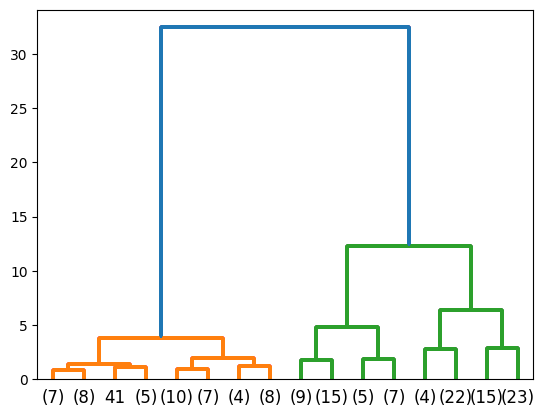

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

def plot_dendrogram(model,**kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i,merge in enumerate(model.children_):
    current_count = 0
    for child_idx_ in merge :
      if child_idx_ < n_samples:
        current_count += 1
      else:
        current_count += counts[child_idx_ - n_samples]
    counts[i] = current_count
    linkage_matrix = np.column_stack([
        model.children_,
      model.distances_,
      counts
    ]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
iris = load_iris()
X = iris.data
model = AgglomerativeClustering(distance_threshold = 0, n_clusters=None)
model = model.fit(X)
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

In [ ]:
df

sepal length (cm)  sepal width (cm)  ...  petal width (cm)    species
0                  5.1               3.5  ...               0.2     setosa
1                  4.9               3.0  ...               0.2     setosa
2                  4.7               3.2  ...               0.2     setosa
3                  4.6               3.1  ...               0.2     setosa
4                  5.0               3.6  ...               0.2     setosa
..                 ...               ...  ...               ...        ...
145                6.7               3.0  ...               2.3  virginica
146                6.3               2.5  ...               1.9  virginica
147                6.5               3.0  ...               2.0  virginica
148                6.2               3.4  ...               2.3  virginica
149                5.9               3.0  ...               1.8  virginica

[150 rows x 5 columns]

In [ ]:
import pandas as pd
with open("/content/glass_GST_1.xyz",'r') as f:
  lines = f.readlines()[2:]
data = []
for line in lines:
  if line.strip():
    parts = line.split()
    if len(parts) == 4:
      data.append(parts)
df = pd.DataFrame(data, columns=["Atom", "X", "Y", "Z"])
df.to_csv("data_1.csv", index = False)

In [ ]:
import pandas as pd

try:
  df_data_1 = pd.read_csv("data_1.csv")
  display(df_data_1)
except FileNotFoundError:
  print("Error: data_1.csv not found. Please make sure the previous cell was executed to create the file.")

Atom          X          Y          Z
0     Sb   7.065591  15.394860   1.794129
1     Te   9.468739   6.457455   8.613122
2     Te   3.385535  19.765287   5.363701
3     Sb  21.946884   6.547277  20.357565
4     Ge   3.863227  13.287570  11.152696
..   ...        ...        ...        ...
310   Sb   3.316880   0.609407   7.774347
311   Sb   3.042919  20.922251   2.727087
312   Te   7.945895  11.870018   5.154717
313   Te  11.026751  13.959569   7.755935
314   Sb   7.650986   2.346621   4.920433

[315 rows x 4 columns]

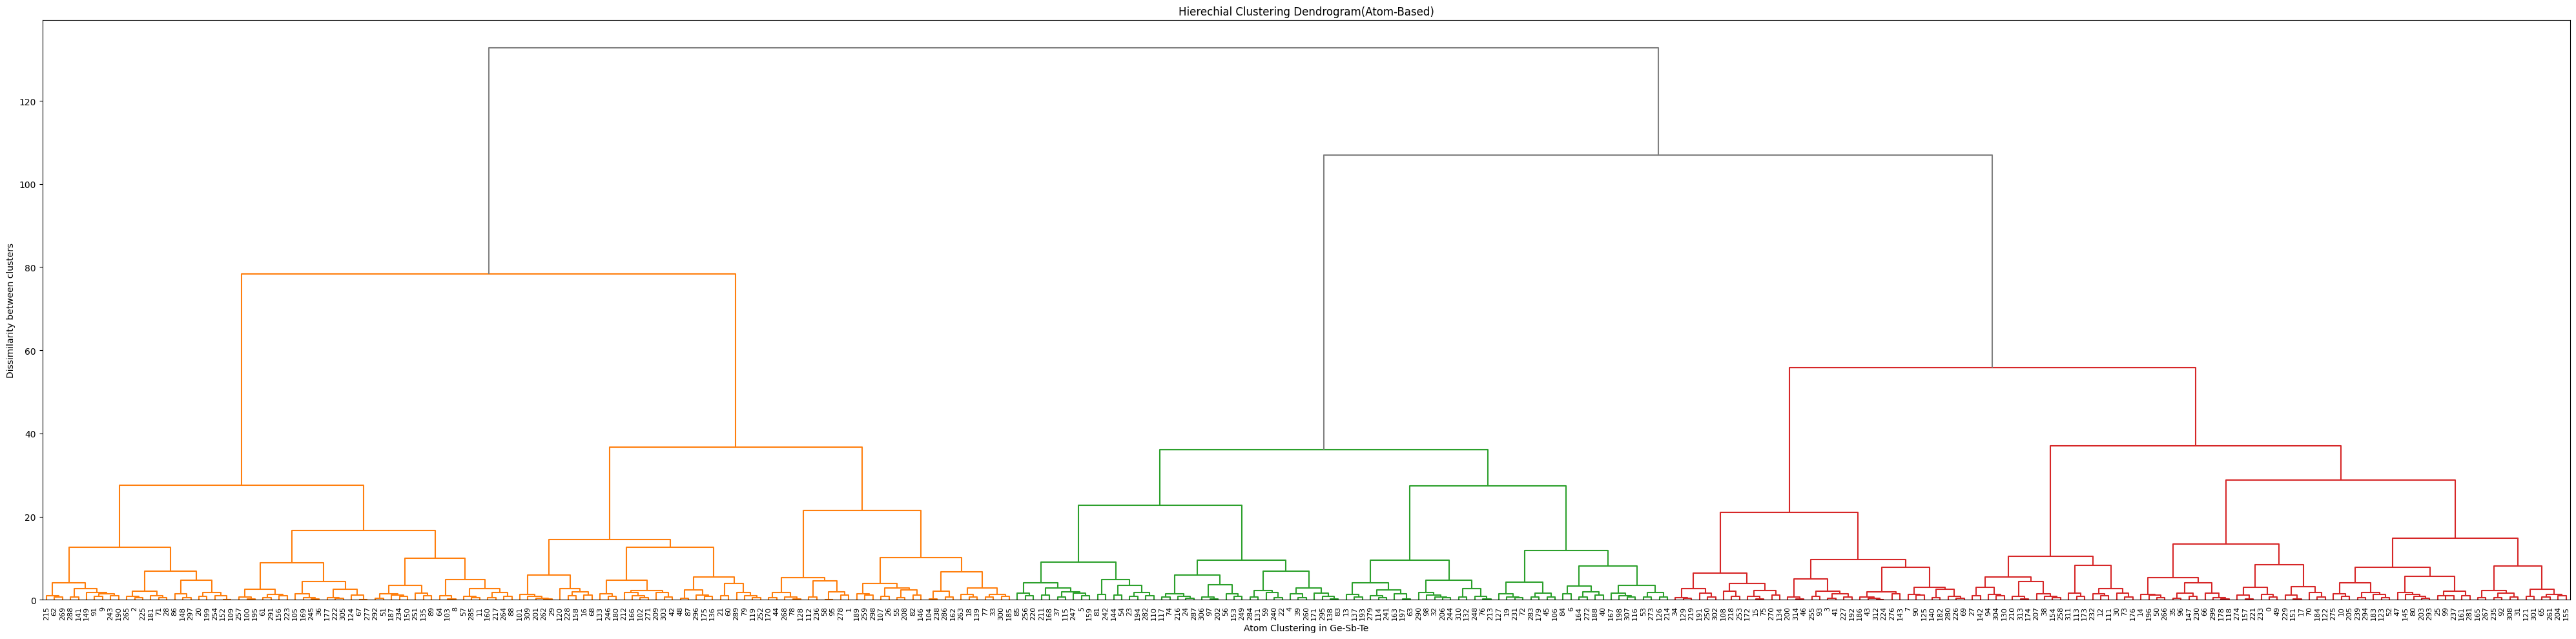

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import LabelEncoder
import numpy as np

X = df_data_1.iloc[:, 2:5].values
labels = df_data_1.iloc[:, 1].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

Z = linkage(X, method='ward')
plt.figure(figsize=(40,10))
plt.title("Hierechial Clustering Dendrogram(Atom-Based)")
plt.xlabel("Atom Clustering in Ge-Sb-Te")
plt.ylabel("Dissimilarity between clusters")
dendrogram(Z , labels = encoded_labels, leaf_rotation=90, leaf_font_size=8,
           color_threshold = 0.7 * max(Z[:,2]),above_threshold_color='gray' )
unique_species = np.unique(labels)
plt.tight_layout()
# plt.savefig("Dendrogram representation for Ge-Sb-Ti1", dpi = 200)
plt.show()

Estimated number of clusters : 28


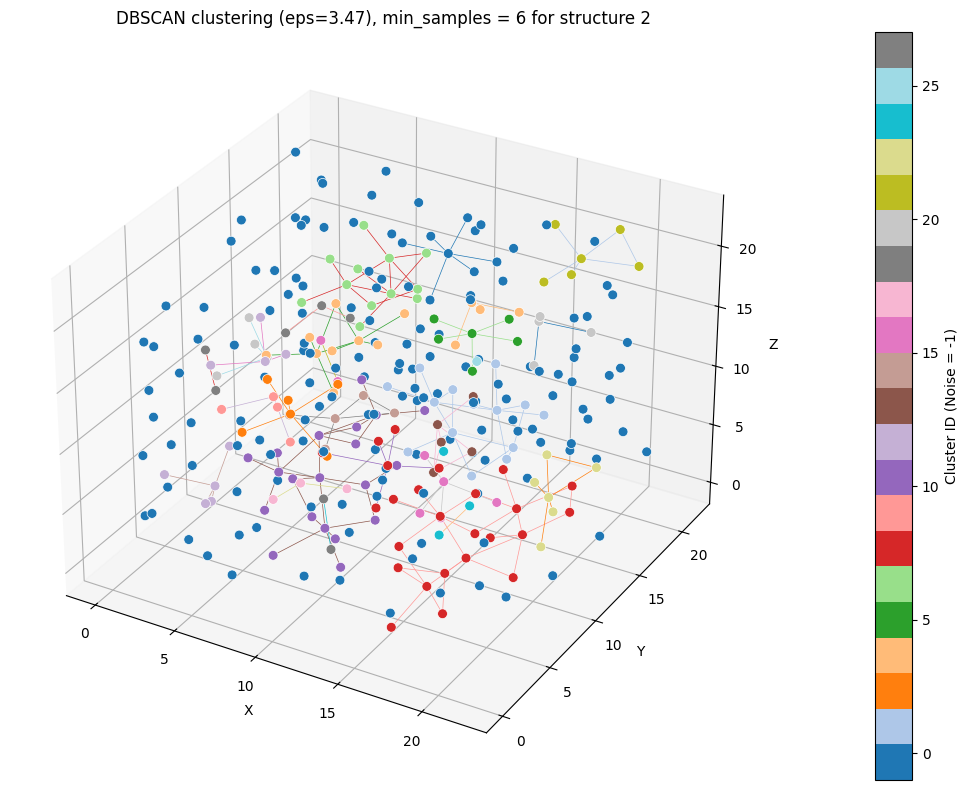

Saved clustered data to 'data_1_clustered.csv'


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

df = pd.read_csv("/content/data_1.csv")
coord_nts = df[['X','Y','Z']].values

eps = 3.47 # 3.47A(Angstrom for the eps cut-off)
min_samples = 6

db = DBSCAN(eps=eps, min_samples=min_samples).fit(coord_nts)
labels = db.labels_ #(-1 for noise or low density)

df['cluster'] = labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Estimated number of clusters : {n_clusters}")

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111 , projection = '3d')
cmap = ListedColormap(plt.cm.tab20.colors + ((0.5, 0.5, 0.5, 1.0),))

scatter = ax.scatter(
    df['X'], df['Y'] , df['Z'],
    c = labels, cmap=cmap, s=50, alpha=1, edgecolors='w', linewidths = 0.5
)

# drawing lines between points in the same cluster
for cluster_if in set(labels):
  # if cluster_if == -1 :
    # continue
  cluster_points = coord_nts[labels == cluster_if]
  if len(cluster_points) <= 100 :
    from scipy.spatial import distance_matrix
    dis_mat = distance_matrix(cluster_points,cluster_points)
    np.fill_diagonal(dis_mat,np.inf) # while calculating minimum distances avoiding self distances

    for i in range(len(cluster_points)):
      neighbors = np.where(dis_mat[i] < eps)[0]
      for j in neighbors:
        if j>i:
          ax.plot(
              [cluster_points[i,0],cluster_points[j,0]],
              [cluster_points[i,1],cluster_points[j,1]],
              [cluster_points[i,2],cluster_points[j,2]],
              color = cmap(cluster_if % 20), alpha = 1, linewidth = 0.5
          )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title(f'DBSCAN clustering (eps={eps}), min_samples = {min_samples} for structure 2')
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster ID (Noise = -1)')
plt.tight_layout()
plt.show()

df.to_csv("data_1_clustered.csv", index = False)
print("Saved clustered data to 'data_1_clustered.csv'")

plt.savefig("clustering_struc_1.png",dpi=300)
plt.show()

Number of clusters: 15


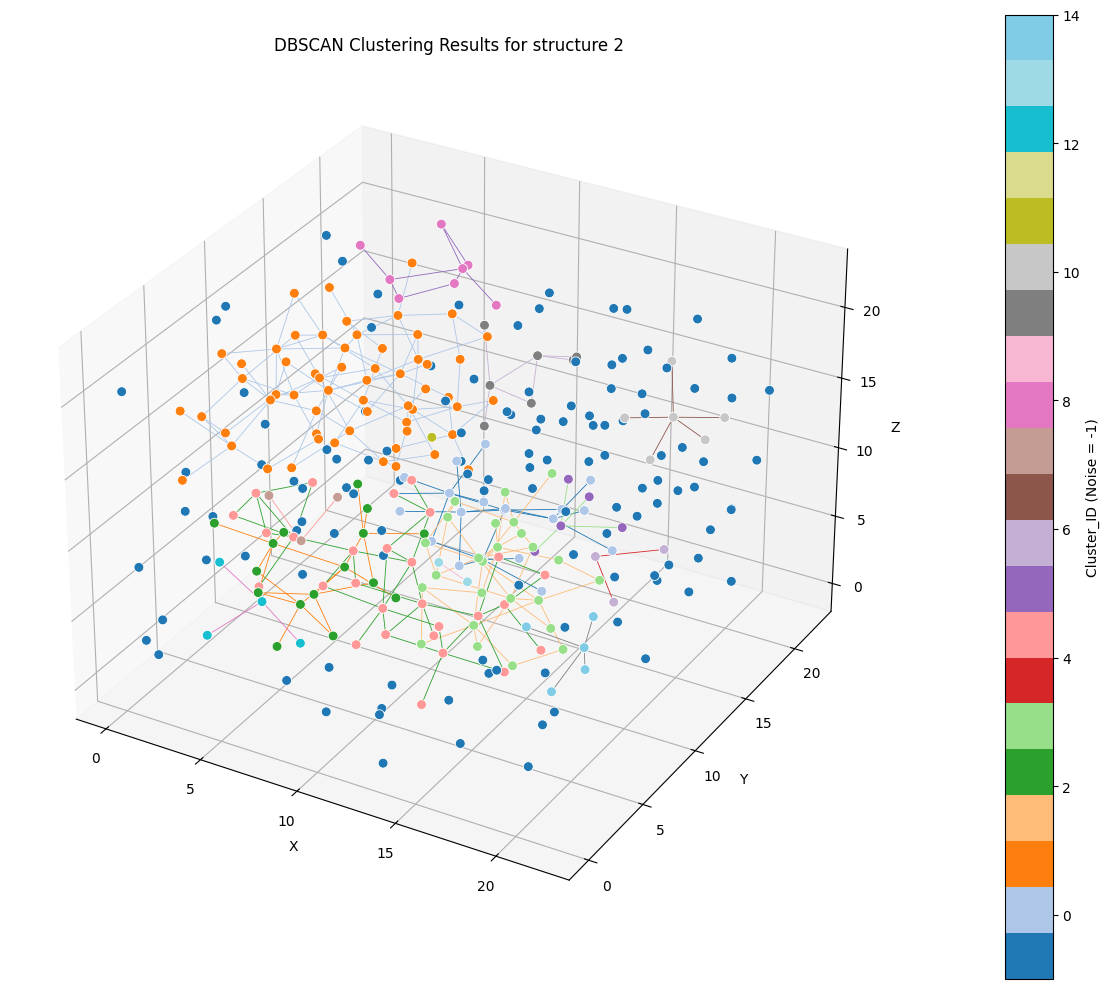

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

with open("/content/glass_GST_2.xyz",'r') as f:
  lines = f.readlines()[2:]
data = []
for line in lines:
  parts = line.split()
  if len(parts) == 4:
    data.append([parts[1], parts[2], parts[3], parts[0]])

df_n = pd.DataFrame(data, columns=['X', 'Y', 'Z', 'Element'])
df_n[['X', 'Y', 'Z']] = df_n[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')

df_n.dropna(subset=['X', 'Y', 'Z'], inplace=True)

min_samples = 6
eps = 3.47
coord_nts = df_n[['X','Y','Z']].values

db = DBSCAN(eps=eps , min_samples=min_samples).fit(coord_nts)
labels = db.labels_
df_n['cluster'] = labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection = '3d')
colors = list(plt.cm.tab20.colors)
colors.append((0.5, 0.8, 0.9 , 1.0))
cmap = ListedColormap(colors)

scatter = ax.scatter(df_n['X'],df_n['Y'],df_n['Z'], c=labels, cmap=cmap , s = 50, alpha = 1,
                     edgecolors='w', linewidths=0.6)

## Drawing lines between points in the same cluster ##
for cls in set(labels):
  cluster_points = coord_nts[labels == cls]
  if len(cluster_points) <= 100:
    from scipy.spatial import distance_matrix
    dis_mate = distance_matrix(cluster_points, cluster_points)
    np.fill_diagonal(dis_mate, np.inf)

    for i in range(len(cluster_points)):
      neighbors = np.where(dis_mate[i] < eps)[0]
      for j in neighbors:
        if j>i:
          ax.plot(
              [cluster_points[i,0],cluster_points[j,0]],
              [cluster_points[i,1],cluster_points[j,1]],
              [cluster_points[i,2],cluster_points[j,2]],
              color = cmap(cls % 20), alpha = 1 , linewidth = 0.6
          )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('DBSCAN Clustering Results for structure 2')
cbar = plt.colorbar(scatter, label='Cluster Label', pad = 0.1 , ax=ax)
cbar.set_label('Cluster_ID (Noise = -1)')
plt.tight_layout()
df_n.to_csv('glass_GST_2.csv', index=False)
plt.savefig("clustering_struc_2.png",dpi=300)
plt.show()

Number of clusters : 18


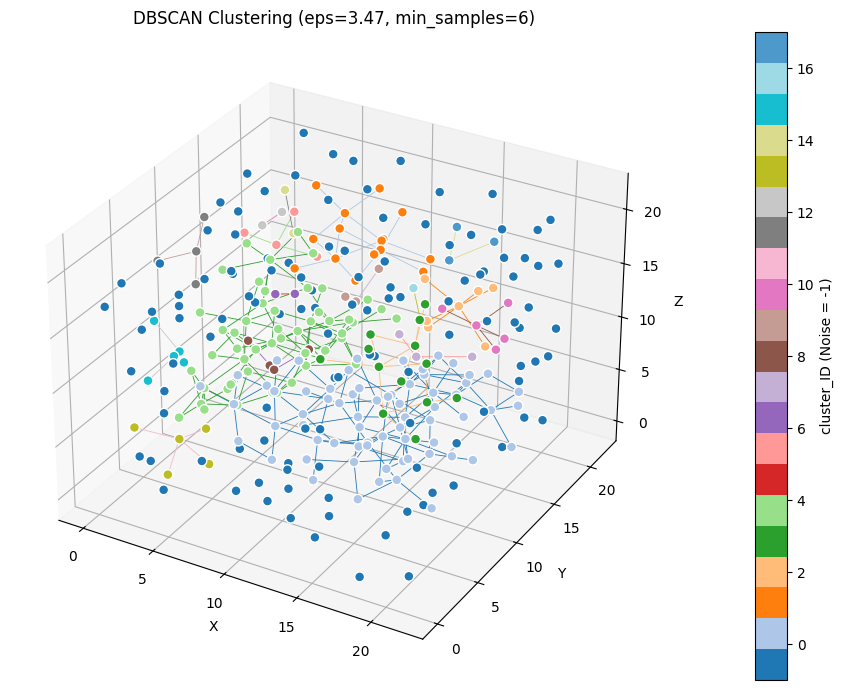

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

with open("/content/glass_GST_3.xyz",'r') as f:
  lines = f.readlines()[2:]
  data = []
  for line in lines:
    parts = line.split()
    if len(parts) == 4:
      data.append([parts[1], parts[2], parts[3], parts[0]])
df = pd.DataFrame(data , columns = ['X', 'Y', 'Z', 'Element'])
df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']].apply(pd.to_numeric, errors = 'coerce')
df.dropna(subset = ['X','Y','Z'], inplace =True)
eps = 3.47
min_samples = 6
coord = df[['X', 'Y', 'Z']].values
db = DBSCAN(eps = eps, min_samples = min_samples).fit(coord)
labels = db.labels_
df['cluster'] = labels
n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters : {n_cluster}")

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')
colors = list(plt.cm.tab20.colors)
colors.append([0.3, 0.6, 0.8, 1])
cmap = ListedColormap(colors)

scatter = ax.scatter(df['X'], df['Y'], df['Z'], c=labels, cmap=cmap, s = 50, alpha=1, edgecolors = 'w', linewidth = 1)
for cluster in set(labels):
  cluster_points = coord[labels == cluster]
  if len(cluster_points) <= 100 :
    from scipy.spatial import distance_matrix
    dist_mat = distance_matrix(cluster_points,cluster_points)
    np.fill_diagonal(dist_mat, np.inf)

    for i in range(len(cluster_points)):
      neighbors = np.where(dist_mat[i] < eps)[0]
      for j in neighbors:
        if j>i:
          ax.plot(
              [cluster_points[i,0],cluster_points[j,0]],
              [cluster_points[i,1],cluster_points[j,1]],
              [cluster_points[i,2],cluster_points[j,2]],
              color = cmap(cluster % 20), alpha =1, linewidth = 0.6
          )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
cbar = plt.colorbar(scatter, label = 'Cluster Label', pad = 0.1, ax=ax)
cbar.set_label("cluster_ID (Noise = -1)")
plt.tight_layout()
plt.savefig("clustering_struc_3.png",dpi=300)
plt.show()

#**Modified RDF and Coordination number**

In [ ]:
!pip install MDAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.signal import find_peaks
from scipy.integrate import simpson
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import pandas as pd

# Load your universe
u = mda.Universe("glass_GST_1.xyz")
df = pd.read_csv('/content/glass_GST_1.csv')
dimension = df[['X','Y','Z']].values
min_coords = np.min(dimension,axis=0)
max_coords = np.max(dimension,axis=0)
l_r = max_coords - min_coords
u.dimensions = [l_r[0],l_r[1],l_r[2], 90, 90, 90]  # Adjust box size

# Define atom selections
Ge = u.select_atoms("name Ge")
Te = u.select_atoms("name Te")
Sb = u.select_atoms("name Sb")

# Create a dictionary to store RDF analyses with their pairs
rdf_dict = {
    "Ge-Ge": rdf.InterRDF(Ge, Ge, nbins=100, range=(0, 10)),
    "Ge-Sb": rdf.InterRDF(Ge, Sb, nbins=100, range=(0, 10)),
    "Ge-Te": rdf.InterRDF(Ge, Te, nbins=100, range=(0, 10)),
    "Sb-Sb": rdf.InterRDF(Sb, Sb, nbins=100, range=(0, 10)),
    "Sb-Te": rdf.InterRDF(Sb, Te, nbins=100, range=(0, 10)),
    "Te-Te": rdf.InterRDF(Te, Te, nbins=100, range=(0, 10)),
}

for name, analysis in rdf_dict.items():
    analysis.run()

def coordination_calc(rdf_analysis, ref_atom_group):
    r = rdf_analysis.results.bins
    g_r = rdf_analysis.results.rdf

    peaks, _ = find_peaks(g_r)
    minima, _ = find_peaks(-g_r)  #

    if len(peaks) == 0 or len(minima) == 0:
        raise ValueError("No peaks/minima detected in RDF")

    first_min = minima[minima > peaks[0]][0] if minima[minima > peaks[0]].size > 0 else len(r) - 1
    r_cutoff = r[first_min]

    rho = ref_atom_group / np.prod(u.dimensions[:3])
    integrand = 4 * np.pi * r**2 * g_r  * rho
    n_r = simpson(integrand[:first_min], r[:first_min])

    return r_cutoff, n_r

results = {}

for name, analysis in rdf_dict.items():
    groupB = name.split("-")[1]
    # ref_group = eval(groupB)
    ref_group = df[df['Atom'] == groupB].shape[0]


    try:
        r_cut, n_r = coordination_calc(analysis, ref_group)
        results[name] = {"r_cut": r_cut, "n_r": n_r}
        print(f"{name}: Cutoff = {r_cut:.2f} Å, Coordination number = {n_r:.2f}")
    except Exception as e:
        print(f"Error processing {name}: {str(e)}")
        results[name] = {"error": str(e)}

print("\nFinal Results:")
for pair, data in results.items():
    if "error" in data:
        print(f"{pair}: ERROR - {data['error']}")
    else:
        print(f"{pair}: Cutoff = {data['r_cut']:.2f} Å, CN = {data['n_r']:.2f}")

Ge-Ge: Cutoff = 3.05 Å, Coordination number = 0.44
Ge-Sb: Cutoff = 2.95 Å, Coordination number = 0.05
Ge-Te: Cutoff = 3.05 Å, Coordination number = 2.70
Sb-Sb: Cutoff = 3.05 Å, Coordination number = 0.40
Sb-Te: Cutoff = 3.15 Å, Coordination number = 1.96
Te-Te: Cutoff = 3.05 Å, Coordination number = 0.36

Final Results:
Ge-Ge: Cutoff = 3.05 Å, CN = 0.44
Ge-Sb: Cutoff = 2.95 Å, CN = 0.05
Ge-Te: Cutoff = 3.05 Å, CN = 2.70
Sb-Sb: Cutoff = 3.05 Å, CN = 0.40
Sb-Te: Cutoff = 3.15 Å, CN = 1.96
Te-Te: Cutoff = 3.05 Å, CN = 0.36


/usr/local/lib/python3.11/dist-packages/MDAnalysis/analysis/base.py:542: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[idx] = ts.time


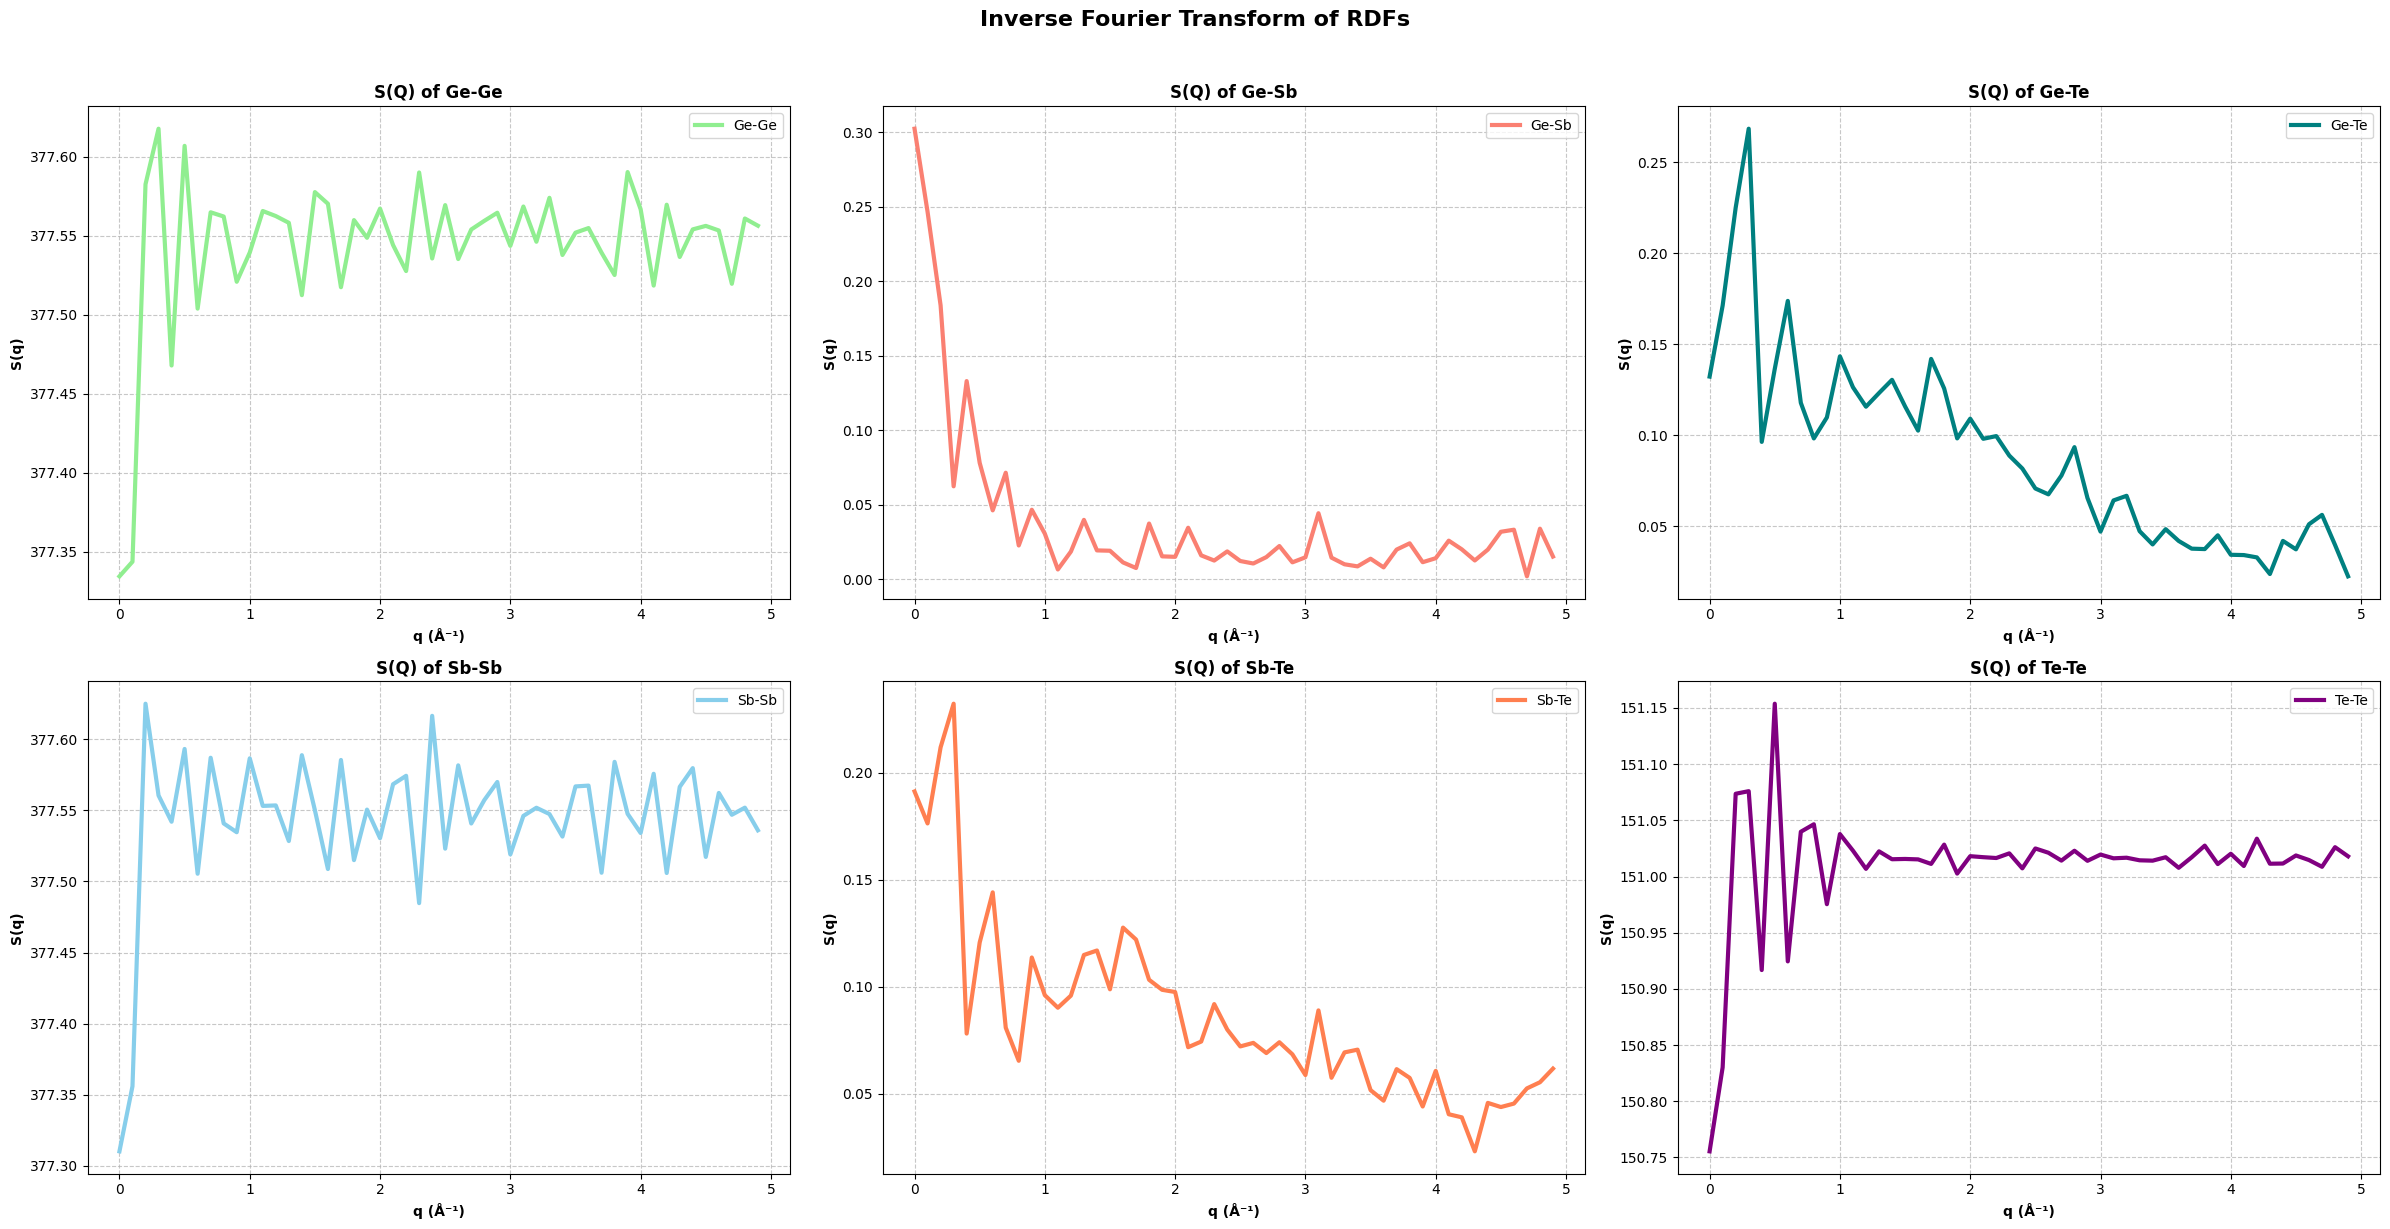

In [ ]:
from scipy.fft import ifft
import matplotlib.pyplot as plt

colors = ['lightgreen','salmon','teal','skyblue','coral','purple']
fig,axes = plt.subplots(2,3,figsize=(24,12))
fig.suptitle('Inverse Fourier Transform of RDFs',fontsize=16, y=1.02, fontweight='bold')
axes = axes.flatten()

for idx,(name,ax) in enumerate(zip(rdf_dict.keys(),axes)):
  r = rdf_dict[name].results.bins
  g_r = rdf_dict[name].results.rdf

  gr_norm = g_r - 1
  f_t = ifft(gr_norm)
  n = len(r)
  dr = r[1] - r[0]
  t = np.fft.fftfreq(n, d=dr)[:n//2]
  f_t_abs = np.abs(f_t[:n//2])


  ax.plot(t, f_t_abs, color=colors[idx], label=name, linewidth=3)
  ax.set_title(f'S(Q) of {name}', fontsize=12,fontweight='bold')
  ax.set_xlabel('q (Å⁻¹)', fontsize=10,fontweight='bold')
  ax.set_ylabel('S(q)', fontsize=10,fontweight='bold')
  ax.grid(True, linestyle='--', alpha=0.7)
  ax.legend()

plt.tight_layout()
plt.savefig('rdf_plots_comb.png',dpi=400)
plt.show()

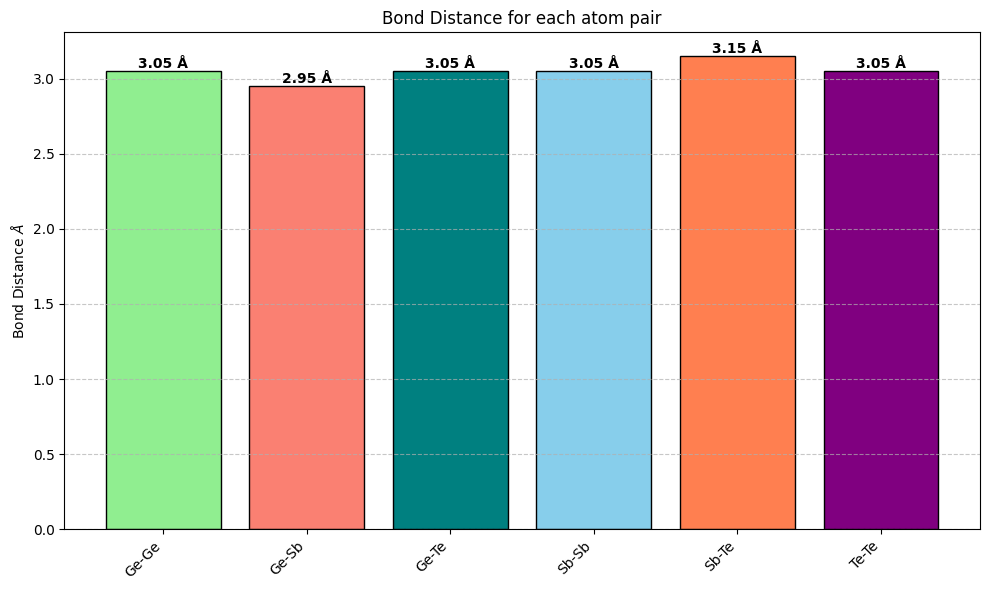

In [ ]:
r_cutoff = [results[key]['r_cut'] for key in results]
labels = [key for key in results]
plt.figure(figsize=(10,6))
x_positions = np.arange(len(labels))
# colors = plt.cm.viridis(np.linspace(0,1, len(labels)))
colors = ['lightgreen','salmon','teal','skyblue','coral','purple']

bars = plt.bar(x_positions, r_cutoff, color=colors, edgecolor='black')

plt.xticks(x_positions, labels, rotation=45, ha='right')
plt.ylabel('Bond Distance $\AA$')
plt.title('Bond Distance for each atom pair')
plt.grid(axis='y',linestyle='--',alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    if yval < 0.1 or yval > 0.1:
        plt.text(bar.get_x() + bar.get_width()/2.0,
                yval ,
                f'{yval:.2f} Å',
                va='bottom',
                ha='center',
                color='black',
                fontweight='bold')

plt.tight_layout()
plt.savefig("bond_distance_plot.png", dpi=300)
plt.show()

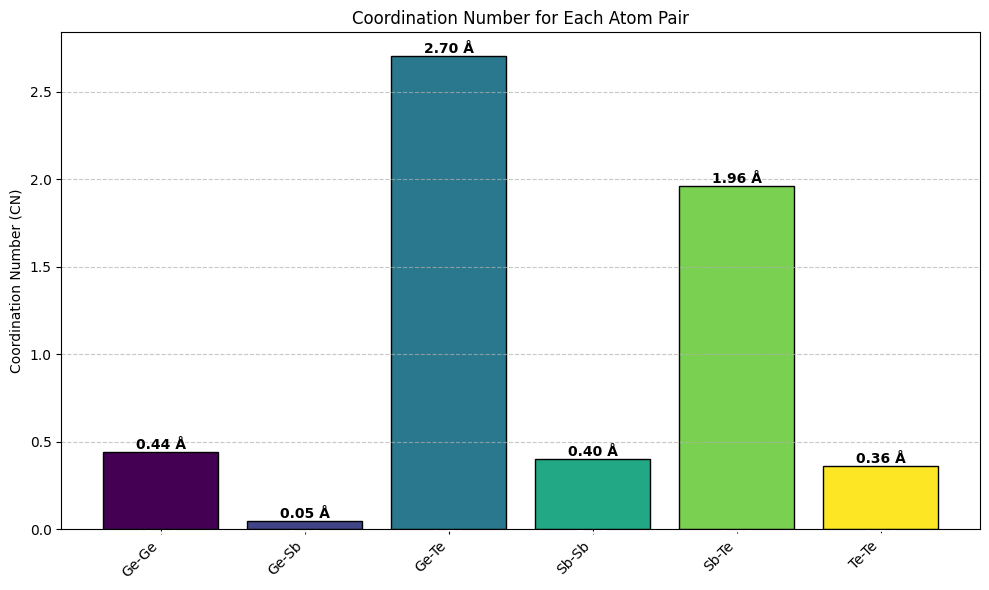

In [ ]:
CN = [results[key]['n_r'] for key in results]
labels = [key for key in results]

plt.figure(figsize=(10, 6))

x_positions = np.arange(len(labels))

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
bars = plt.bar(x_positions, CN, color=colors, edgecolor='black')
plt.xticks(x_positions, labels, rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 0, f'{yval:.2f}', va='top', ha='center', color='white', fontweight='bold')

plt.ylabel('Coordination Number (CN)')
plt.title('Coordination Number for Each Atom Pair')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    if yval < 0.1 or yval > 0.1:
        plt.text(bar.get_x() + bar.get_width()/2.0,
                yval ,
                f'{yval:.2f} Å',
                va='bottom',
                ha='center',
                color='black',
                fontweight='bold')
plt.tight_layout()
plt.savefig("CN_plot.png", dpi=300)
plt.show()

/usr/local/lib/python3.11/dist-packages/MDAnalysis/analysis/base.py:542: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[idx] = ts.time


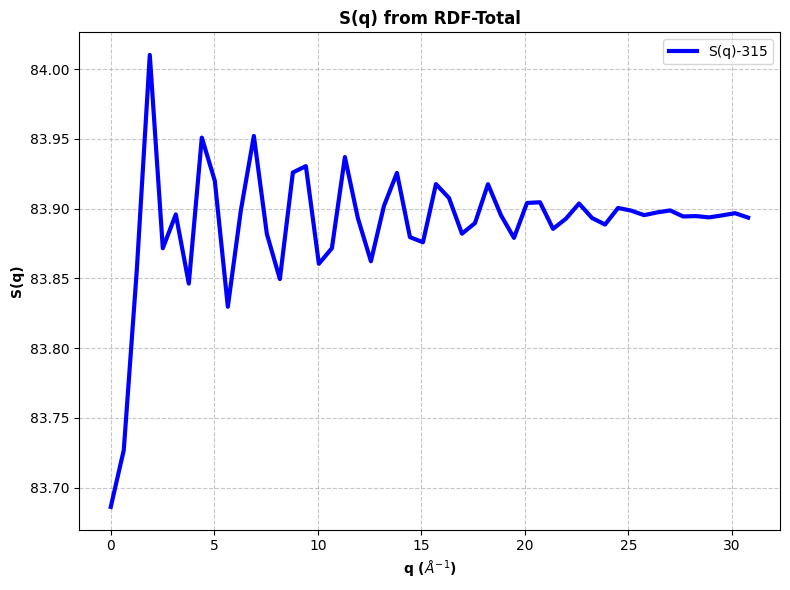

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf

u = mda.Universe("glass_GST_1.xyz")
u.dimensions = [l_r[0], l_r[1], l_r[2], 90, 90, 90]

total_rdf = rdf.InterRDF(u.atoms, u.atoms, range=(0, 10), nbins=100)
total_rdf.run()
rdf_tot = {'rdf': total_rdf.results.rdf,
           'bins': total_rdf.results.bins}

r = rdf_tot['bins']
g_r = rdf_tot['rdf']

g_r_norm = g_r - 1
s_q_complex = ifft(g_r_norm)

n = len(r)
dr = r[1] - r[0]
q = np.fft.fftfreq(n, d=dr) * 2 * np.pi
s_q_abs = np.abs(s_q_complex)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(q[:n//2], s_q_abs[:n//2], label='S(q)-315', color='blue', linewidth=3)
ax.set_title('S(q) from RDF-Total', fontsize=12, fontweight='bold')
ax.set_xlabel('q ($Å^{-1}$)', fontsize=10, fontweight='bold')
ax.set_ylabel('S(q)', fontsize=10, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.savefig('rdf_plots.png', dpi=400)
plt.show()

In [ ]:
def eta_alpha_calc(combo):

  ## eta_ab_0 calculation ##
  a = combo.split('-')[0]
  b = combo.split('-')[1]
  b_den = len(df[df['Atom'] == b])/l_r[:3].prod()
  a_den = len(df[df['Atom'] == a])/l_r[:3].prod()
  a = combo.split('-')[0]
  b = combo.split('-')[1]
  if a == b:
    n_a = results[combo]['n_r']
    n_b = results[combo.replace(a,b)]['n_r']
  if a != b:
    combo_newa = f'{a}-{a}'
    n_a = results[combo_newa]['n_r']
    combo_newb = f'{b}-{b}'
    n_b = results[combo_newb]['n_r']
  n_ab = results[combo]['n_r']
  m,n = coordination_calc(total_rdf,1)
  if a_den*n_a <= b_den*n_b :
    eta_ab_max = a_den*n_a/b_den*n_b
  else:
    eta_ab_max = b_den*n_b/a_den*n_a
  eta_ab0 = ((n_ab*n)/(a_den*n_a*n_b)-1)/(eta_ab_max)

  ## alpha_a/alpha_b calculation ##
  num_A   = 1- (results[combo]['n_r']/(a_den*b_den)*(n_a + n_b))
  denom_A = 1- (n_a/(a_den*b_den)*(n_a + n_b))
  alpha_a = num_A/denom_A

  num_B   = 1- (results[combo]['n_r']/(a_den*b_den)*(n_a + n_b))
  denom_B = 1- (n_b/(a_den*b_den)*(n_a + n_b))
  alpha_b = num_B/denom_B

  return np.log(eta_ab0)/10,np.log(alpha_a)/10,np.log(alpha_b)/10

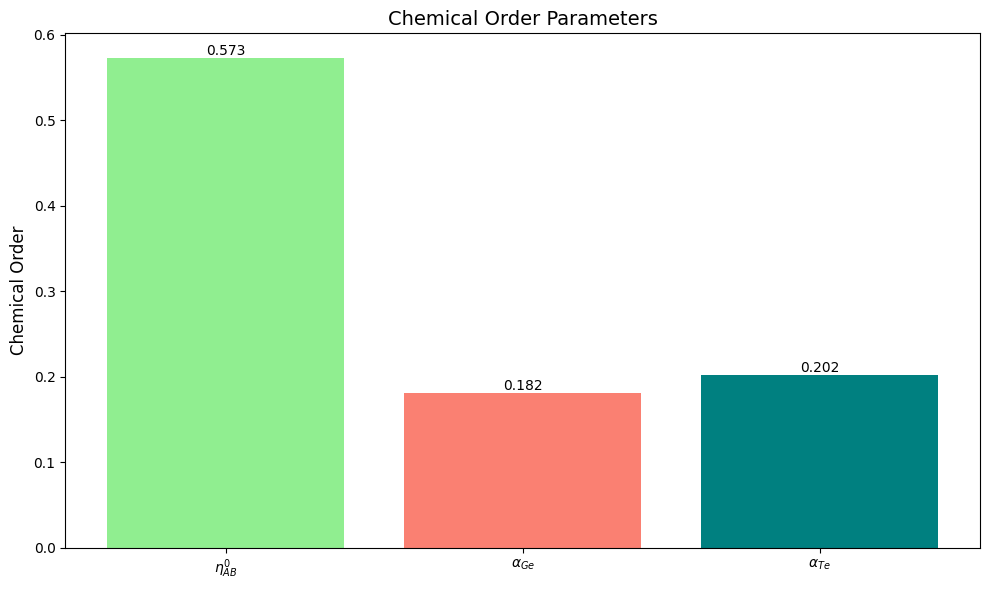

In [ ]:
eta_o1,a_1,b_1 = eta_alpha_calc('Ge-Te')
import matplotlib.pyplot as plt

x_labels = [r'$\eta_{AB}^0$',r'$\alpha_{Ge}$',r'$\alpha_{Te}$']
plt.figure(figsize=(10, 6))
bars = plt.bar(x_labels, [eta_o1,a_1,b_1], color=['lightgreen','salmon','teal'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.ylabel('Chemical Order', fontsize=12)
plt.title('Chemical Order Parameters', fontsize=14)
plt.tight_layout()
plt.show()

#**Old Coordination and RDF**

In [ ]:
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt
import numpy as np

with open('/content/glass_GST_1.xyz','r') as f:
  lines = f.readlines()[2:]
data = []
for line in lines:
  parts = line.split()
  if len(parts) == 4:
    data.append(parts)
df = pd.DataFrame(data,columns=['atom','x','y','z'])

# Convert coordinate columns to numeric
df[['x', 'y', 'z']] = df[['x', 'y', 'z']].apply(pd.to_numeric)

RDF calculation completed for Ge-Ge
RDF calculation completed for Ge-Te
RDF calculation completed for Ge-Sb
RDF calculation completed for Sb-Sb
RDF calculation completed for Te-Sb
RDF calculation completed for Te-Te


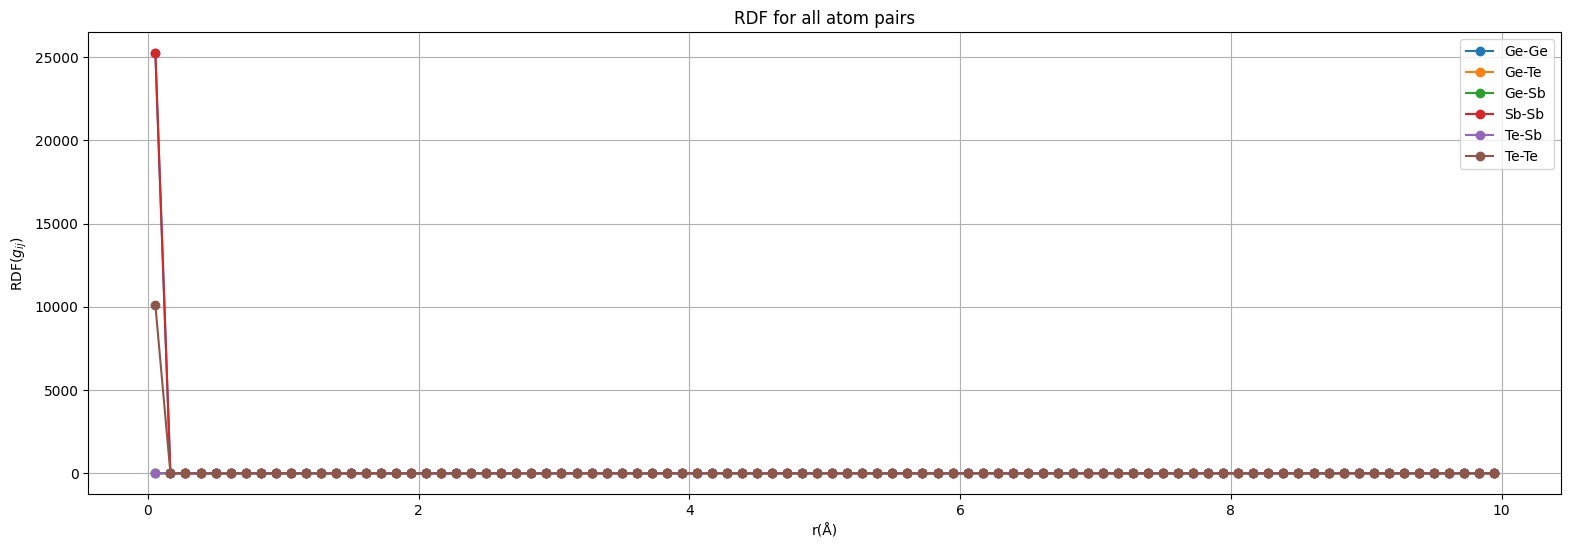

In [ ]:
ge_df = df[df['atom'] == 'Ge']
te_df = df[df['atom'] == 'Te']
sb_df = df[df['atom'] == 'Sb']
n_atoms = len(df)

n_residues = n_atoms
n_segments = n_atoms

u = mda.Universe.empty(
    n_atoms = n_atoms,
    n_residues = n_residues,
    n_segments = n_segments,
    trajectory = True,
    atom_resindex = np.arange(n_atoms),
    residue_segindex = np.zeros(n_residues, dtype=int)
)

u.atoms.positions = df[['x', 'y', 'z']].values

u.add_TopologyAttr('name', df['atom'].values)
u.add_TopologyAttr('type', df['atom'].values)

coords = df[['x', 'y', 'z']].values
min_coords = np.min(coords, axis = 0)
max_coords = np.max(coords, axis = 0)
box_dimensions = np.array([21.651, 21.651, 21.651])
u.dimensions = np.append(box_dimensions, [90.0, 90.0, 90.0])

def df_to_atomgroup(df,universe):
  indices = df.index.values
  return universe.atoms[indices]

ge_ag = df_to_atomgroup(ge_df,u)
te_ag = df_to_atomgroup(te_df,u)
sb_ag = df_to_atomgroup(sb_df,u)

pairs = [
    ('Ge-Ge',ge_ag,ge_ag),
    ('Ge-Te',ge_ag,te_ag),
    ('Ge-Sb',ge_ag,sb_ag),
    ('Sb-Sb',sb_ag,sb_ag),
    ('Te-Sb',te_ag,sb_ag),
    ('Te-Te',te_ag,te_ag),
]

rdf_results = {}
for name,ag1,ag2 in pairs:
  if len(ag1)>0 and len(ag2)>0 :
    rdf = InterRDF(ag1,ag2,range=(0,10),nbins=90)
    rdf.run()
    rdf_results[name] = {
        'bins':rdf.results.bins,
        'rdf' :rdf.results.rdf,
    }
    print(f'RDF calculation completed for {name}')
  else:
    print(f'Skipping {name}: Empty AtomGroup(s)')
plt.figure(figsize=(19,6))
for name,data in rdf_results.items():
  plt.plot(data['bins'],data['rdf'],label=name,marker='o')
plt.xlabel('r(Å)')
plt.ylabel('RDF($g_{ij}$)')
plt.legend()
plt.grid()
plt.title('RDF for all atom pairs')
# plt.savefig('rdf_results.png')
plt.show()

In [ ]:
rdf_results

{'Ge-Ge': {'bins': array([0.05555556, 0.16666667, 0.27777778, 0.38888889, 0.5       ,
         0.61111111, 0.72222222, 0.83333333, 0.94444444, 1.05555556,
         1.16666667, 1.27777778, 1.38888889, 1.5       , 1.61111111,
         1.72222222, 1.83333333, 1.94444444, 2.05555556, 2.16666667,
         2.27777778, 2.38888889, 2.5       , 2.61111111, 2.72222222,
         2.83333333, 2.94444444, 3.05555556, 3.16666667, 3.27777778,
         3.38888889, 3.5       , 3.61111111, 3.72222222, 3.83333333,
         3.94444444, 4.05555556, 4.16666667, 4.27777778, 4.38888889,
         4.5       , 4.61111111, 4.72222222, 4.83333333, 4.94444444,
         5.05555556, 5.16666667, 5.27777778, 5.38888889, 5.5       ,
         5.61111111, 5.72222222, 5.83333333, 5.94444444, 6.05555556,
         6.16666667, 6.27777778, 6.38888889, 6.5       , 6.61111111,
         6.72222222, 6.83333333, 6.94444444, 7.05555556, 7.16666667,
         7.27777778, 7.38888889, 7.5       , 7.61111111, 7.72222222,
         7.833333

In [ ]:
bond_distance = []
labels = []
for name,data in rdf_results.items():
  rdf = data['rdf']
  bins = data['bins']
  in_y = np.argmax(rdf)
  r_cutoff = bins[in_y]
  bond_distance.append(r_cutoff)
  labels.append(name)
  print(f"{name}: r_cutoff = {r_cutoff:.2f} Å")

Ge-Ge: r_cutoff = 0.06 Å
Ge-Te: r_cutoff = 2.72 Å
Ge-Sb: r_cutoff = 4.06 Å
Sb-Sb: r_cutoff = 0.06 Å
Te-Sb: r_cutoff = 2.83 Å
Te-Te: r_cutoff = 0.06 Å


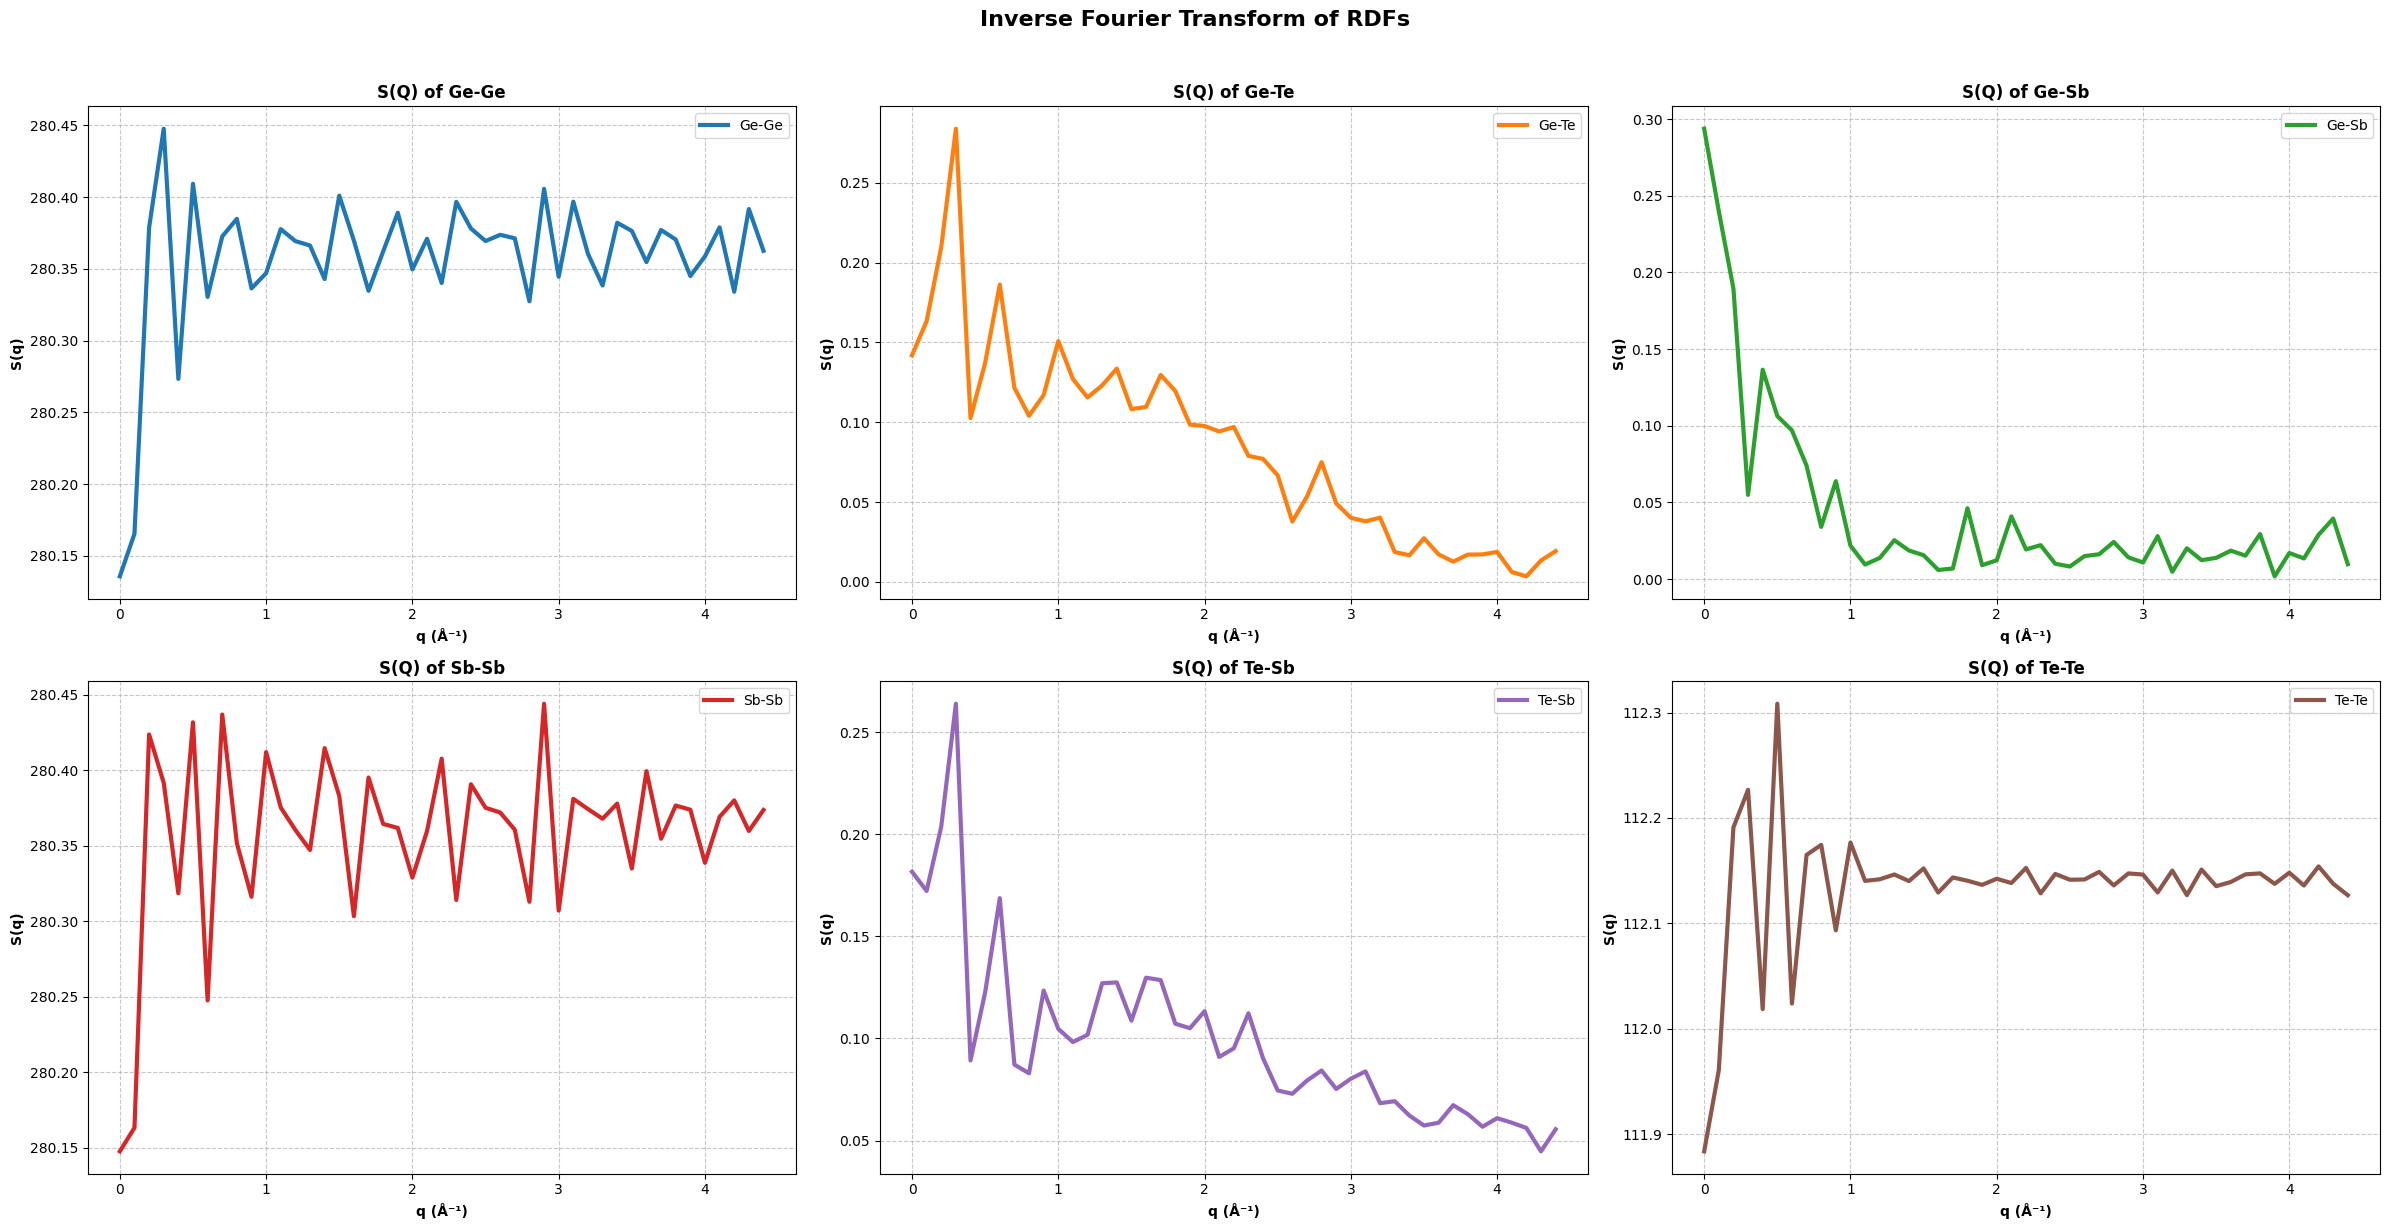

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import ifft

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, axes = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle('Inverse Fourier Transform of RDFs', fontsize=16, y=1.02, fontweight='bold')

axes = axes.flatten()

for idx, (name, ax) in enumerate(zip(rdf_results.keys(), axes)):
    r = rdf_results[name]['bins']
    g_r = rdf_results[name]['rdf']

    g_r_norm = g_r - 1
    f_t = ifft(g_r_norm)
    n = len(r)
    dr = r[1] - r[0]
    t = np.fft.fftfreq(n, d=dr)[:n//2]
    f_t_abs = np.abs(f_t[:n//2])

    ax.plot(t, f_t_abs, color=colors[idx], label=name, linewidth=3)
    ax.set_title(f'S(Q) of {name}', fontsize=12,fontweight='bold')
    ax.set_xlabel('q (Å⁻¹)', fontsize=10,fontweight='bold')
    ax.set_ylabel('S(q)', fontsize=10,fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

plt.tight_layout()
plt.savefig('rdf_plots.png',dpi=400)
plt.show()

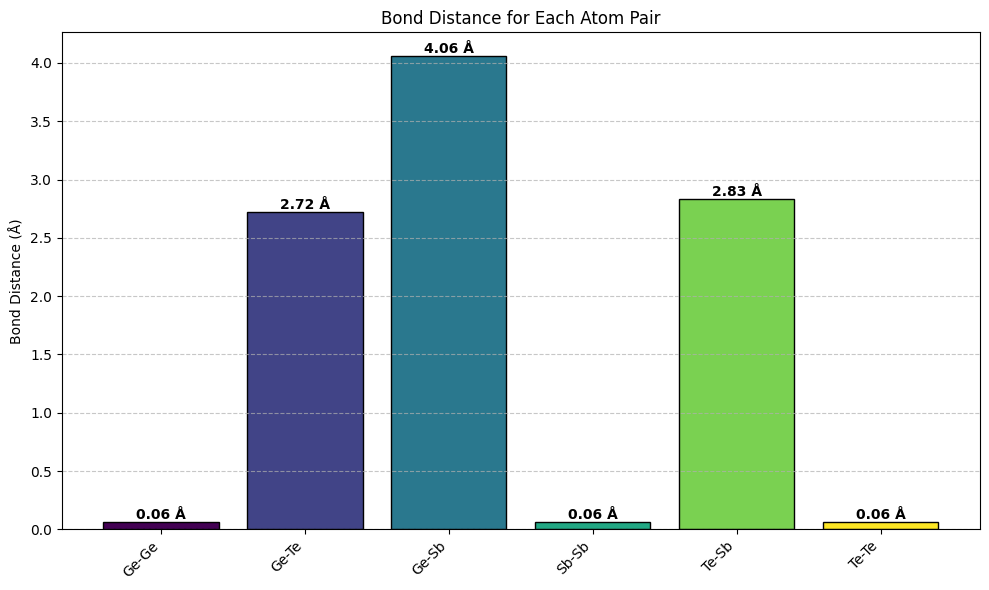

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Ge-Ge', 'Ge-Te', 'Ge-Sb', 'Sb-Sb', 'Te-Sb', 'Te-Te']
r_cutoff = [0.06, 2.72, 4.06, 0.06, 2.83, 0.06]

plt.figure(figsize=(10, 6))
x_positions = np.arange(len(labels))
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

bars = plt.bar(x_positions, r_cutoff, color=colors, edgecolor='black')

plt.xticks(x_positions, labels, rotation=45, ha='right')
plt.ylabel('Bond Distance (Å)')
plt.title('Bond Distance for Each Atom Pair')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    if yval < 0.1 or yval > 0.1:
        plt.text(bar.get_x() + bar.get_width()/2.0,
                yval ,
                f'{yval:.2f} Å',
                va='bottom',
                ha='center',
                color='black',
                fontweight='bold')

plt.tight_layout()
plt.savefig("bond_distance_plot.png", dpi=300)
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import simpson
for name,data in rdf_results.items():
  rdf = data['rdf']
  bins = data['bins']
  dr = bins[1] - bins[0] ## bin width
  first_min_idx = np.argmin(rdf[1:]) + 1
  r_cutoff = bins[first_min_idx]
  mask = bins <= r_cutoff
  coordination_number = 4 * np.pi * simpson(rdf[mask]*bins[mask]**2,bins[mask])*dr
  rdf_results[name]['coordination_number'] = coordination_number
  rdf_results[name]['r_cutoff'] = r_cutoff
  print(f"{name}: CN = {coordination_number:.2f} (cutoff = {r_cutoff:.2f} Å)")

Ge-Ge: CN = 6.04 (cutoff = 0.17 Å)
Ge-Te: CN = 0.00 (cutoff = 0.17 Å)
Ge-Sb: CN = 0.00 (cutoff = 0.17 Å)
Sb-Sb: CN = 6.04 (cutoff = 0.17 Å)
Te-Sb: CN = 0.00 (cutoff = 0.17 Å)
Te-Te: CN = 2.42 (cutoff = 0.17 Å)


In [ ]:
for name, analysis in rdf_dict.items():
    groupB = name.split("-")[1]
    # ref_group = eval(groupB)
    ref_group = df[df['Atom'] == groupB].shape[0]


    try:
        r_cut, n_r = coordination_calc(analysis, ref_group)

In [ ]:
CN = []
cutoff = []
labels = [] # Add a list to store the pair names
for name,data in rdf_results.items():
  CN.append(data['coordination_number'])
  cutoff.append(data['r_cutoff'])
  labels.append(name) # Append the pair name to the labels list

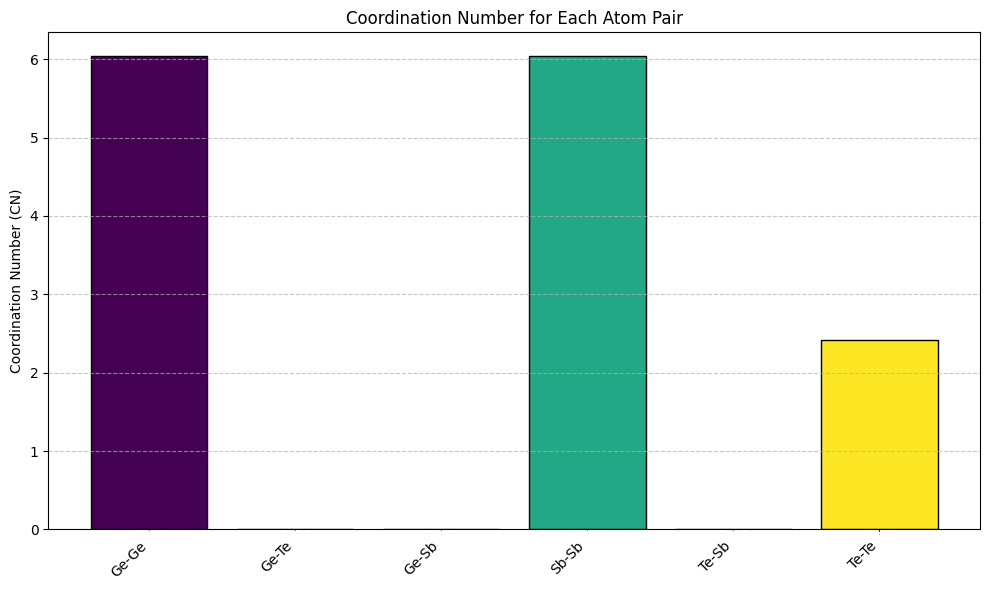

In [ ]:
CN = []
cutoff = []
labels = [] # Add a list to store the pair names
for name,data in rdf_results.items():
  CN.append(data['coordination_number'])
  cutoff.append(data['r_cutoff'])
  labels.append(name) # Append the pair name to the labels list
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

x_positions = np.arange(len(labels))

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
bars = plt.bar(x_positions, CN, color=colors, edgecolor='black')
plt.xticks(x_positions, labels, rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 0, f'{yval:.2f}', va='top', ha='center', color='white', fontweight='bold')

plt.ylabel('Coordination Number (CN)')
plt.title('Coordination Number for Each Atom Pair')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("CN_plot.png", dpi=300)
plt.show()

#**Bond Angle and Dihedral angle**

*   Te-Sb-Te
*   Te-Sb-Te-Sb


In [ ]:
!pip install MDAnalysisTests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 14.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.0/525.0 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.8 MB/s eta 0:00:00
  Created wheel for MDAnalysisTests: filename=mdanalysistests-2.9.0-py3-none-any.whl size=57885679 sha256=b06e1db9f4914eb19f949737a6ca8b6860395b548eae926509971441494a6f33
  Stored in directory: /root/.cache/pip/wheels/86/ae/8e/7b7db05729f6cb4bb9690128f2bc8964562c016d72eb3104a5
Successfully built MDAnalysisTests


In [ ]:
import MDAnalysis as mda
from MDAnalysis.lib import distances
from MDAnalysis.lib.distances import calc_angles,calc_dihedrals
import pandas as pd
import numpy as np

df = pd.read_csv('/content/glass_GST_1.csv')
atom_list = []
for i,row in df.iterrows():
  atom_list.append(
      {
          'name' : row['Atom'],
          'type' : row['Atom'],
          'resname' : 'UNK',
          'resid': i+1,
          }
  )

names = [a['name'] for a in atom_list]
types = [a['type'] for a in atom_list]
resnames = [a['resname'] for a in atom_list]
resids = [a['resid'] for a in atom_list]
elements = df['Atom'].values

n_atoms = len(atom_list)
n_residues = n_atoms
n_segments = 1 ### all in one segment

u = mda.Universe.empty(
    n_atoms = n_atoms,
    n_residues = n_residues,
    n_segments = n_segments,
    trajectory = True,
    atom_resindex = np.arange(n_atoms),
    residue_segindex = np.zeros(n_residues, dtype=int)
)

u.add_TopologyAttr('name',names)
u.add_TopologyAttr('type',types)
u.add_TopologyAttr('resname',resnames)
u.add_TopologyAttr('resid',resids)
u.add_TopologyAttr('element',elements)
u.add_TopologyAttr('segid',['SYS'] * n_segments)

u.atoms.positions = df[['X','Y','Z']].values

def find_bond_neighbors(u,cutoff=3.0):
  dist_matrix = distances.distance_array(u.atoms.positions,u.atoms.positions)
  bonds = []
  for i in range(len(u.atoms)):
    for j in range(i+1,len(u.atoms)):
      if dist_matrix[i,j] < cutoff:
        bonds.append((i,j))
  return bonds
bonds = find_bond_neighbors(u)
### defining a dictionary for the neighbors
neighbors = {i:[] for i in range(len(u.atoms))}
for a1,a2 in bonds:
  neighbors[a1].append(a2)
  neighbors[a2].append(a1)
def find_te_sb_te_triplets(u,neighbors):
  triplets = []
  elements = u.atoms.elements
  for mid_atom in range(len(u.atoms)):
    if elements[mid_atom] != 'Sb':
      continue
    te_neighbors = [n for n in neighbors[mid_atom] if elements[n] == 'Te']
    if len(te_neighbors) >= 2 :
      for i in range(len(te_neighbors)):
        for j in range(i+1 , len(te_neighbors)):
          triplets.append((te_neighbors[i],mid_atom,te_neighbors[j]))
  return triplets
te_sb_te_triplets = find_te_sb_te_triplets(u,neighbors)
def find_te_sb_te_sb_quartets(u,neighbors,te_sb_te_triplets):
  quartets = []
  elements = u.atoms.elements
  for left_te,sb1,right_te in te_sb_te_triplets:
    for te in [left_te,right_te]:
      sb_neighbors = [n for n in neighbors[te] if elements[n] == 'Sb' and n != sb1]
      for sb2 in sb_neighbors:
        te_neighbors = [n for n in neighbors[sb2] if elements[n] == 'Te' and n != te]
        for te2 in te_neighbors:
          if te2 == left_te:
            quartets.append((left_te,sb1,te2,sb2))
          else:
            quartets.append((right_te,sb1,te2,sb2))
  return quartets
te_sb_te_sb_quartets = find_te_sb_te_sb_quartets(u,neighbors,te_sb_te_triplets)

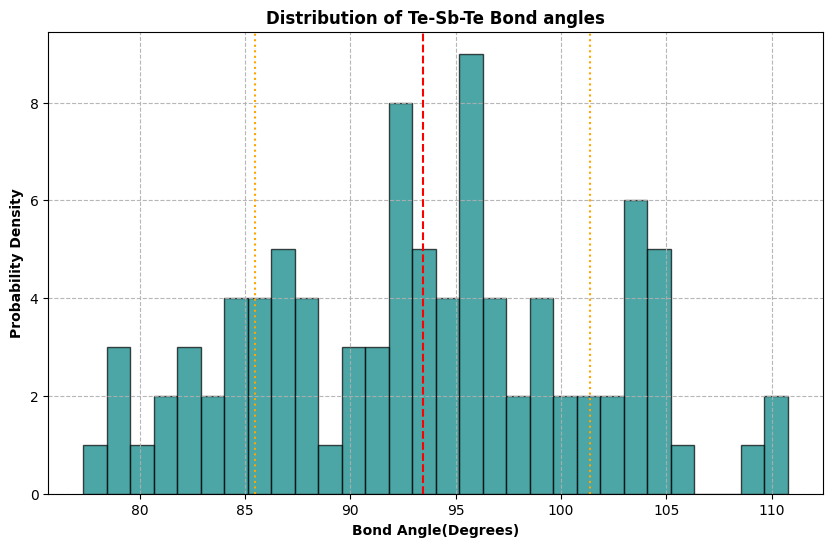

Number of Te-Sb-Te angles: 93
Mean angle: 93.43° ± 7.94°
Angle range: 77.33° to 110.76°


In [ ]:
#### Final evaluation ####
import matplotlib.pyplot as plt
if te_sb_te_triplets:
  te_sb_te_angles = []
  for left_te,sb1,right_te in te_sb_te_triplets:
    angle = calc_angles(u.atoms[left_te].position,u.atoms[sb1].position,u.atoms[right_te].position)
    te_sb_te_angles.append(np.degrees(angle))

  mean_angle = np.mean(te_sb_te_angles)
  std_angle = np.std(te_sb_te_angles)
  plt.figure(figsize=(10,6))
  plt.hist(te_sb_te_angles,bins=30,color='teal',edgecolor='black',alpha=0.7)
  plt.grid(True,linestyle = '--', alpha = 0.9)
  plt.xlabel("Bond Angle(Degrees)",fontweight='bold')
  plt.ylabel("Probability Density",fontweight='bold')

  plt.axvline(mean_angle, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_angle:.1f}°')
  plt.axvline(mean_angle + std_angle, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ: {std_angle:.1f}°')
  plt.axvline(mean_angle - std_angle, color='orange', linestyle=':', linewidth=1.5)
  plt.title("Distribution of Te-Sb-Te Bond angles",fontweight='bold')
  plt.savefig('bond_angle_1.png',dpi=300)
  plt.show()

  print(f"Number of Te-Sb-Te angles: {len(te_sb_te_angles)}")
  print(f"Mean angle: {mean_angle:.2f}° ± {std_angle:.2f}°")
  print(f"Angle range: {min(te_sb_te_angles):.2f}° to {max(te_sb_te_angles):.2f}°")

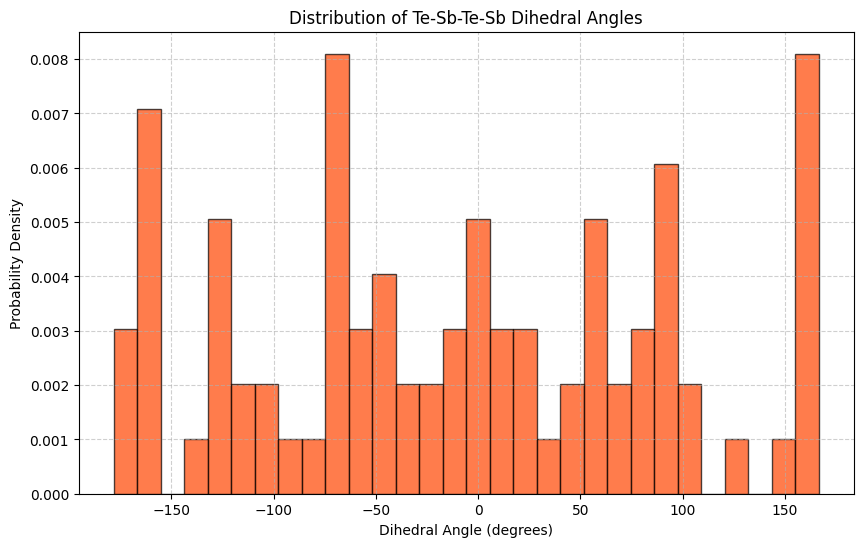

In [ ]:
if te_sb_te_sb_quartets:
  te_sb_te_sb_dihedrals = []
  for a1,a2,a3,a4 in te_sb_te_sb_quartets:
    dihedral = calc_dihedrals(u.atoms[a1].position,u.atoms[a2].position,u.atoms[a3].position,u.atoms[a4].position)
    te_sb_te_sb_dihedrals.append(np.degrees(dihedral))
  plt.figure(figsize=(10, 6))
  plt.hist(te_sb_te_sb_dihedrals,edgecolor='black', bins=30, density=True, alpha=0.7, color='orangered')
  plt.xlabel('Dihedral Angle (degrees)')
  plt.ylabel('Probability Density')
  plt.title('Distribution of Te-Sb-Te-Sb Dihedral Angles')
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.savefig('dihedral_angle_1.png',dpi=300)
  plt.show()

In [ ]:
import numpy as np
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.lib import distances
from MDAnalysis.lib.distances import calc_angles, calc_dihedrals

df = pd.read_csv("/content/glass_GST_1.csv")

atoms_list = []
for i, row in df.iterrows():
    atoms_list.append({
        'name': row['Atom'],
        'type': row['Atom'],
        'resname': 'UNK',
        'resid': i + 1,
    })

names = [a['name'] for a in atoms_list]
types = [a['type'] for a in atoms_list]
resnames = [a['resname'] for a in atoms_list]
resids = [a['resid'] for a in atoms_list]
elements = df['Atom'].values

n_atoms = len(atoms_list)
n_residues = n_atoms
n_segments = 1

u = mda.Universe.empty(
    n_atoms=n_atoms,
    n_residues=n_residues,
    n_segments=n_segments,
    trajectory=True,
    atom_resindex=np.arange(n_atoms),
    residue_segindex=np.zeros(n_residues, dtype=int)
)

u.add_TopologyAttr('name', names)
u.add_TopologyAttr('type', types)
u.add_TopologyAttr('resname', resnames)
u.add_TopologyAttr('resid', resids)
u.add_TopologyAttr('element', elements)
u.add_TopologyAttr('segid', ['SYS'] * n_segments)

u.atoms.positions = df[['X', 'Y', 'Z']].values

def find_bond_neighbors(u, cutoff=3.0):
    dist_matrix = distances.distance_array(u.atoms.positions, u.atoms.positions)
    bonds = []
    for i in range(len(u.atoms)):
        for j in range(i+1, len(u.atoms)):
            if dist_matrix[i,j] < cutoff:
                bonds.append((i,j))
    return bonds

bonds = find_bond_neighbors(u)
neighbors = {i:[] for i in range(len(u.atoms))}
for a1, a2 in bonds:
    neighbors[a1].append(a2)
    neighbors[a2].append(a1)

def find_te_ge_te_triplets(u, neighbors):
    triplets = []
    elements = u.atoms.elements
    for middle_atom in range(len(u.atoms)):
        if elements[middle_atom] != 'Ge':
            continue
        te_neighbors = [n for n in neighbors[middle_atom] if elements[n] == 'Te']
        if len(te_neighbors) >= 2:
            for i in range(len(te_neighbors)):
                for j in range(i+1, len(te_neighbors)):
                    triplets.append((te_neighbors[i], middle_atom, te_neighbors[j]))
    return triplets

def find_te_ge_te_ge_quartets(u, neighbors, te_ge_te_triplets):
    quartets = []
    elements = u.atoms.elements
    for left_te, ge1, right_te in te_ge_te_triplets:
        for te in [left_te, right_te]:
            ge_neighbors = [n for n in neighbors[te] if elements[n] == 'Ge' and n != ge1]
            for ge2 in ge_neighbors:
                te2_neighbors = [n for n in neighbors[ge2] if elements[n] == 'Te' and n != te]
                for te2 in te2_neighbors:
                    if te == left_te:
                        quartet = (left_te, ge1, te2 , ge2)
                    else:
                        quartet = (right_te, ge2, te ,  ge1)
                    quartets.append(quartet)
    return quartets

te_ge_te_triplets = find_te_ge_te_triplets(u, neighbors)
te_ge_te_ge_quartets = find_te_ge_te_ge_quartets(u, neighbors, te_ge_te_triplets)

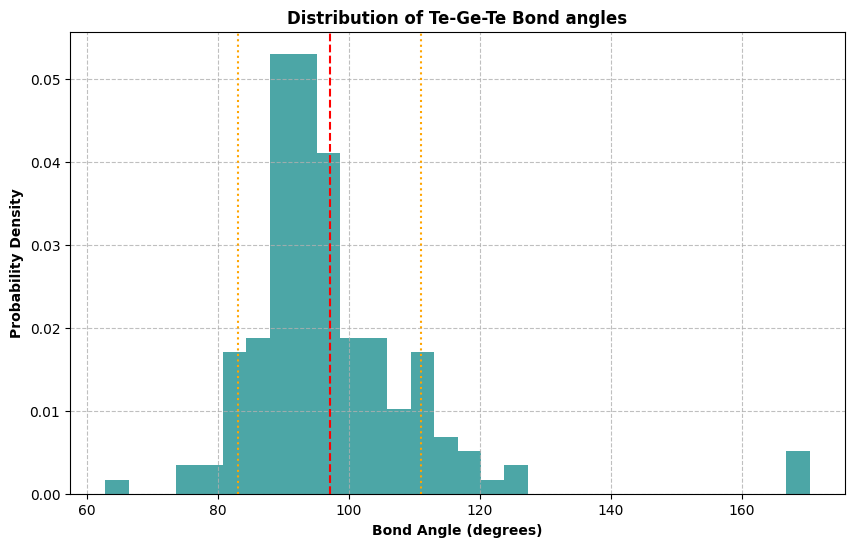

Number of Te-Sb-Te angles: 163
Mean angle: 97.07° ± 14.00°
Angle range: 62.82° to 170.36°


In [ ]:
if te_ge_te_triplets:
  te_ge_te_angles = []
  for left_te,ge,right_te in te_ge_te_triplets:
    angle = calc_angles(u.atoms[left_te].position,u.atoms[ge].position,u.atoms[right_te].position,box=u.dimensions)

    te_ge_te_angles.append(np.degrees(angle))

    mean_angle = np.mean(te_ge_te_angles)
    std_angle = np.std(te_ge_te_angles)
  plt.figure(figsize=(10, 6))
  plt.hist(te_ge_te_angles, bins=30, density=True, alpha=0.7, color='teal')
  # plt.plot(te_ge_te_angles,alpha=0.7,color='teal')
  plt.xlabel('Bond Angle (degrees)',fontweight='bold')
  plt.ylabel('Probability Density',fontweight='bold')
  # plt.title('Distribution of Te-Ge-Te Bond Angles')
  plt.grid(True, linestyle='--', alpha=0.8)

  plt.axvline(mean_angle, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_angle:.1f}°')
  plt.axvline(mean_angle + std_angle, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ: {std_angle:.1f}°')
  plt.axvline(mean_angle - std_angle, color='orange', linestyle=':', linewidth=1.5)
  plt.title("Distribution of Te-Ge-Te Bond angles",fontweight='bold')
  plt.savefig('bond_angle_2.png',dpi=300)
  plt.show()

  print(f"Number of Te-Sb-Te angles: {len(te_ge_te_angles)}")
  print(f"Mean angle: {mean_angle:.2f}° ± {std_angle:.2f}°")
  print(f"Angle range: {min(te_ge_te_angles):.2f}° to {max(te_ge_te_angles):.2f}°")

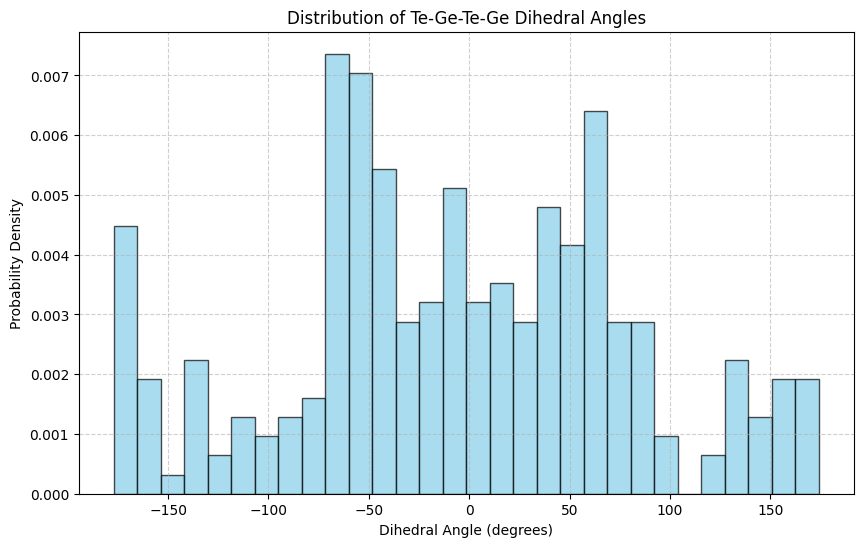

In [ ]:
if te_ge_te_ge_quartets :
  te_ge_te_ge_dihedrals = []
  for a1,a2,a3,a4 in te_ge_te_ge_quartets:
    dihedral = calc_dihedrals(u.atoms[a1].position,u.atoms[a2].position,u.atoms[a3].position,u.atoms[a4].position,box=u.dimensions)
    te_ge_te_ge_dihedrals.append(np.degrees(dihedral))
  plt.figure(figsize=(10, 6))
  plt.hist(te_ge_te_ge_dihedrals, bins=30,edgecolor = 'black', density=True, alpha=0.7, color='skyblue')
  plt.xlabel('Dihedral Angle (degrees)')
  plt.ylabel('Probability Density')
  plt.title('Distribution of Te-Ge-Te-Ge Dihedral Angles')
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.savefig('dihedral_angle_2.png',dpi=300)
  plt.show()

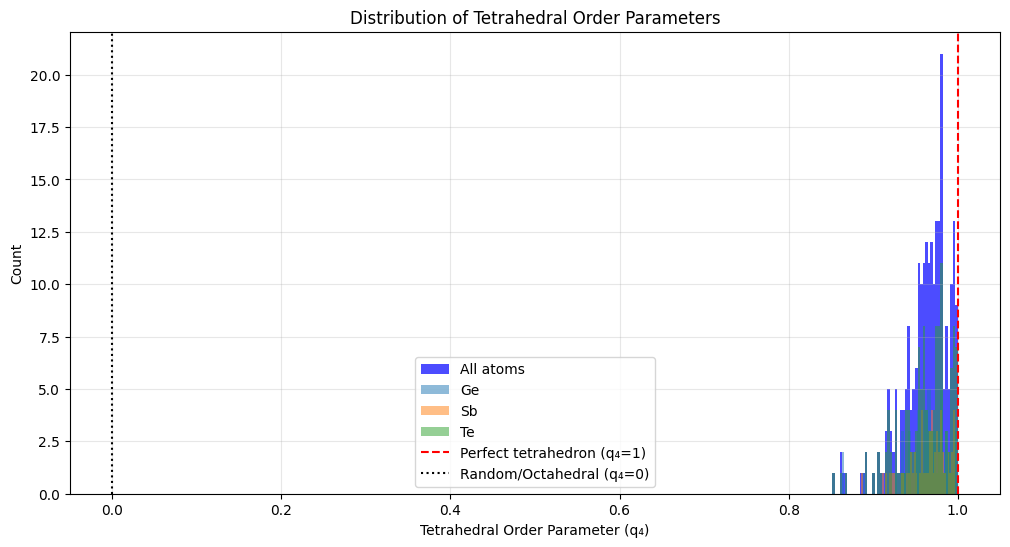

Tetrahedral order parameter statistics:
Overall mean: 0.961
Ge mean: 0.962
Sb mean: 0.963
Te mean: 0.960


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.lib import distances
from MDAnalysis.lib.distances import calc_angles

df = pd.read_csv("/content/glass_GST_1.csv")
elements = df['Atom'].values
positions = df[['X','Y','Z']].values

### Creating the universe ###
u = mda.Universe.empty(len(elements), trajectory=True)
u.add_TopologyAttr('name',elements)
u.add_TopologyAttr('type',elements)
u.add_TopologyAttr('element',elements)
u.atoms.positions = positions

### Finding the neighbors ###
def find_neighbor(u,cutoff=3.0):
  dist_matrix = distances.distance_array(u.atoms.positions,u.atoms.positions)
  neighbors = [[] for _ in range(len(u.atoms))]
  for i in range(len(u.atoms)):
    neighbor_indices = np.where(dist_matrix[i] < cutoff)[0]
    neighbors[i] = neighbor_indices[neighbor_indices != i]
  return neighbors
neighbors = find_neighbor(u)

def calculate_q4(u, neighbors):
    q4_values = []
    for i in range(len(u.atoms)):
        neighbor_indices = neighbors[i]
        n = len(neighbor_indices)
        if n < 2:
            q4_values.append(np.nan)  # Append NaN for atoms with less than 2 neighbors
            continue

        angles = []
        for j in range(n):
            for k in range(j + 1, n):
                angle = calc_angles(u.atoms[neighbor_indices[j]].position,
                                    u.atoms[i].position,
                                    u.atoms[neighbor_indices[k]].position,
                                    box=u.dimensions)
                angles.append(np.degrees(angle))

        angles = np.array(angles)
        sum_term = np.sum((np.cos(np.radians(angles)) + 1/3)**2)
        q4 = 1 - (3/8) * sum_term/ (n*(n-1)/2) # Normalize by the number of angle pairs
        q4_values.append(q4)

    return np.array(q4_values)


# Calculate q4 for all atoms
q4 = calculate_q4(u, neighbors)

plt.figure(figsize=(12, 6))
plt.hist(q4[~np.isnan(q4)], bins=50, alpha=0.7, color='blue', label='All atoms')
plt.xlabel('Tetrahedral Order Parameter (q₄)')
plt.ylabel('Count')
plt.title('Distribution of Tetrahedral Order Parameters')

for element in ['Ge', 'Sb', 'Te']:
    mask = elements == element
    if np.sum(mask) > 0: # Check if there are atoms of this element
        plt.hist(q4[mask & ~np.isnan(q4)], bins=50, alpha=0.5, label=element)


plt.axvline(1, color='red', linestyle='--', label='Perfect tetrahedron (q₄=1)')
plt.axvline(0, color='black', linestyle=':', label='Random/Octahedral (q₄=0)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('q4_plot.png',dpi=300)
plt.show()

# Print statistics
print("Tetrahedral order parameter statistics:")
print(f"Overall mean: {np.nanmean(q4):.3f}")
for element in ['Ge', 'Sb', 'Te']:
  mask = elements == element
  if np.sum(mask) > 0:
    print(f"{element} mean: {np.nanmean(q4[mask]):.3f}")

In [ ]:
!pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 37.7 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=b197e46fd80b5643a32bebf6a26a3e6bfa67b1e745a98ada589b0f6e3371e24f
  Stored in directory: /root/.cache/pip/wheels/16/fb/76/306387739cf9d53b1c39b0c8aadbbb17dc05f256756d8fd915
Successfully built bibtexparser


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymatgen.core import Structure
from pymatgen.analysis.local_env import VoronoiNN

df = pd.read_csv("/content/glass_GST_1.csv")
elements = df['Atom'].values
coords = df[['X', 'Y', 'Z']].values
lattice_size = max(coords.max(axis=0) - coords.min(axis=0)) + 10
structure = Structure(
    lattice=np.diag([lattice_size, lattice_size, lattice_size]),
    species=elements,
    coords=coords,
    coords_are_cartesian=True
)
def calculate_ring_stats(structure, cut_off=3.0):
  vnn = VoronoiNN(cutoff = cut_off)
  rings = {}
  for i in range(len(structure)):
    neighbors = vnn.get_nn_info(structure,i)
    neighbor_indices = [n['site_index'] for n in neighbors]
    if len(neighbor_indices) >= 2:
      ring_size = len(neighbor_indices)
      rings[ring_size] = rings.get(ring_size, 0) + 1
  return rings
ring_counts = calculate_ring_stats(structure)

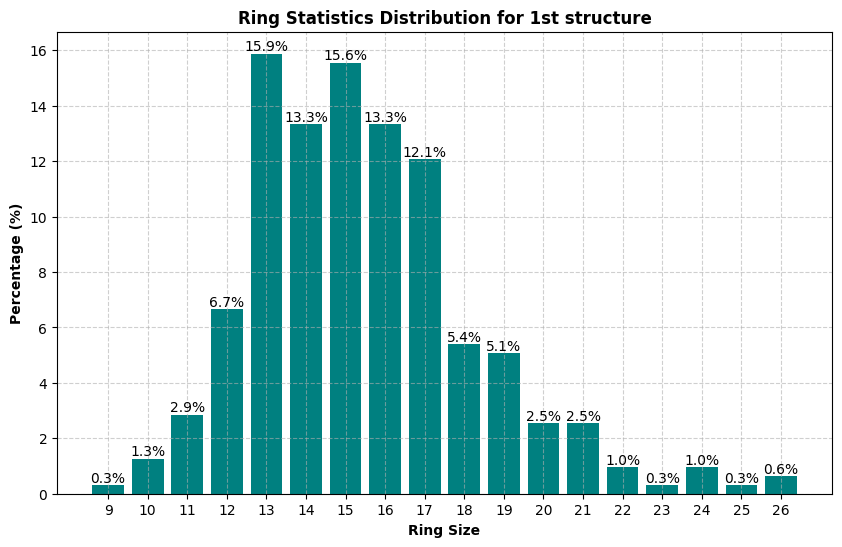

Ring Statistics Summary:
Ring Size Count     Percentage
------------------------------
9         1         0.32      %
10        4         1.27      %
11        9         2.86      %
12        21        6.67      %
13        50        15.87     %
14        42        13.33     %
15        49        15.56     %
16        42        13.33     %
17        38        12.06     %
18        17        5.40      %
19        16        5.08      %
20        8         2.54      %
21        8         2.54      %
22        3         0.95      %
23        1         0.32      %
24        3         0.95      %
25        1         0.32      %
26        2         0.63      %


In [ ]:
total_rings = sum(ring_counts.values())
ring_percentages = {size: (count/total_rings)*100 for size, count in ring_counts.items()}

plt.figure(figsize=(10, 6))
sizes, percents = zip(*sorted(ring_percentages.items()))
bars = plt.bar(sizes, percents, color='teal')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.xlabel('Ring Size', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.title('Ring Statistics Distribution for 1st structure', fontweight='bold')
plt.xticks(range(min(sizes), max(sizes)+1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('ring_stats_1.png',dpi=300)
plt.show()

print("Ring Statistics Summary:")
print(f"{'Ring Size':<10}{'Count':<10}{'Percentage':<10}")
print("-"*30)
for size in sorted(ring_counts.keys()):
    print(f"{size:<10}{ring_counts[size]:<10}{ring_percentages[size]:<10.2f}%")


In [ ]:
import pandas as pd
from pymatgen.analysis.local_env import VoronoiNN
from pymatgen.core import Structure

df= pd.read_csv("/content/glass_GST_2.csv")
elements = df['Element'].values
coords = df[['X', 'Y', 'Z']].values
lattice_size = max(coords.max(axis=0) - coords.min(axis=0)) + 10 ## adding padding to avoid atoms on edges
structure = Structure(
    lattice = np.diag([lattice_size,lattice_size,lattice_size]),
    species = elements,
    coords = coords,
    coords_are_cartesian = True
)
def calculate_ring(structure, cut_off=3.0):
  vnn = VoronoiNN(cutoff = cut_off)
  rings = {}
  for i in range(len(structure)):
    neighbors = vnn.get_nn_info(structure,i)
    neighbors_indices = [n['site_index'] for n in neighbors]
    if len(neighbors_indices) >= 3:
      rings_size = len(neighbors_indices)
      rings[rings_size] = rings.get(rings_size,0) + 1
  return rings,neighbors
ring_counts,neighbors = calculate_ring(structure)

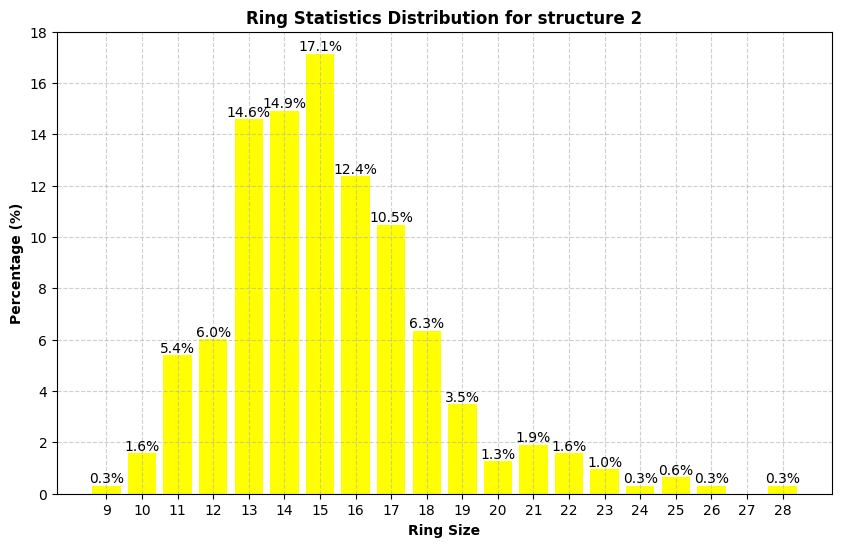

Ring Statistics Summary:
Ring Size Count     Percentage
------------------------------
9         1         0.32      %
10        5         1.59      %
11        17        5.40      %
12        19        6.03      %
13        46        14.60     %
14        47        14.92     %
15        54        17.14     %
16        39        12.38     %
17        33        10.48     %
18        20        6.35      %
19        11        3.49      %
20        4         1.27      %
21        6         1.90      %
22        5         1.59      %
23        3         0.95      %
24        1         0.32      %
25        2         0.63      %
26        1         0.32      %
28        1         0.32      %


In [ ]:
total_rings = sum(ring_counts.values())
ring_percentages = {size: (count/total_rings)*100 for size,count in ring_counts.items()}

plt.figure(figsize=(10, 6))
sizes, percents = zip(*sorted(ring_percentages.items()))
bars = plt.bar(sizes, percents, color='yellow')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.xlabel('Ring Size', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.title('Ring Statistics Distribution for structure 2', fontweight='bold')
plt.xticks(range(min(sizes), max(sizes)+1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('ring_stats_2.png',dpi=300)
plt.show()

print("Ring Statistics Summary:")
print(f"{'Ring Size':<10}{'Count':<10}{'Percentage':<10}")
print("-"*30)
for size in sorted(ring_counts.keys()):
    print(f"{size:<10}{ring_counts[size]:<10}{ring_percentages[size]:<10.2f}%")

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi,Delaunay
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("/content/glass_GST_2.csv")
def calculated_void_space(df,spacing=0.3,cutoff=2.8):
  points = df[['X','Y','Z']].values
  vor = Voronoi(points)
  min_coords = points.min(axis=0) - 5 #padding
  max_coords = points.max(axis=0) + 5 #padding
  x = np.arange(min_coords[0],max_coords[0],spacing)
  y = np.arange(min_coords[1],max_coords[1],spacing)
  z = np.arange(min_coords[2],max_coords[2],spacing)
  xx , yy , zz = np.meshgrid(x,y,z)
  mesh_points = np.vstack([xx.ravel(),yy.ravel(),zz.ravel()]).T
  delaunay = Delaunay(points)
  simplex = delaunay.find_simplex(mesh_points)
  vertices = delaunay.simplices

  valid = simplex >= 0
  dist = np.full(mesh_points.shape[0] , np.inf)
  if np.any(valid):
    for p,s in zip(mesh_points[valid],simplex[valid]):
      tera = points[vertices[s]]
      distances = np.linalg.norm(tera - p,axis=0)
      dist[valid] = np.minimum(dist[valid], np.min(distances, axis=0))
  outside = ~ valid
  if np.any(outside):
    from scipy.spatial import cKDTree
    tree = cKDTree(points)
    dist[outside],_ = tree.query(mesh_points[outside])
  void_points = mesh_points[dist > cutoff]
  total_volume = np.prod(max_coords - min_coords)
  void_volume = len(void_points) * (spacing**3)
  void_fraction = void_volume / total_volume
  return void_volume,void_fraction,void_points
void_vol , void_frac , void_points = calculated_void_space(df)

Total void volume: 20794.35 Å³
Void fraction: 0.6128


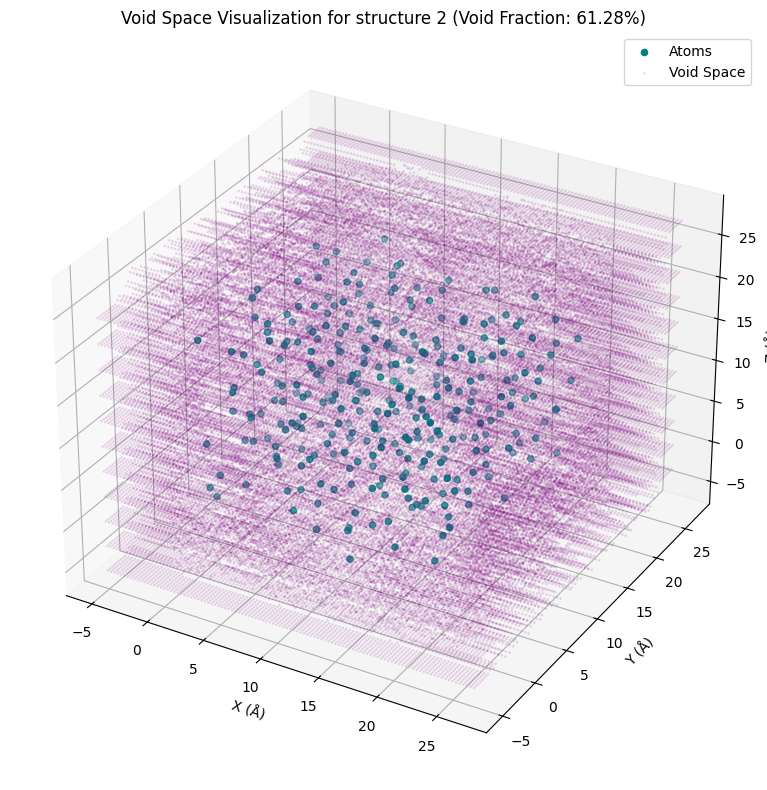

In [ ]:
print(f"Total void volume: {void_vol:.2f} Å³")
print(f"Void fraction: {void_frac:.4f}")

# Optional visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot atoms
ax.scatter(df['X'], df['Y'], df['Z'], c='teal', s=20, label='Atoms')

# Plot void points (sample every 10th point for clarity)
if len(void_points) > 0:
    ax.scatter(void_points[::10, 0], void_points[::10, 1], void_points[::10, 2],
               c='purple', s=1, alpha=0.1, label='Void Space')

ax.set_xlabel('X (Å)')
ax.set_ylabel('Y (Å)')
ax.set_zlabel('Z (Å)')
ax.legend()
plt.title(f'Void Space Visualization for structure 2 (Void Fraction: {void_frac:.2%})')
plt.tight_layout()
plt.savefig("void_space_visualization_2.png", dpi=300)
plt.show()

In [ ]:
void_points

array([[-5.217024, -5.069446, -5.233663],
       [-5.217024, -5.069446, -4.933663],
       [-5.217024, -5.069446, -4.633663],
       ...,
       [26.882976, 26.430554, 26.866337],
       [26.882976, 26.430554, 27.166337],
       [26.882976, 26.430554, 27.466337]])

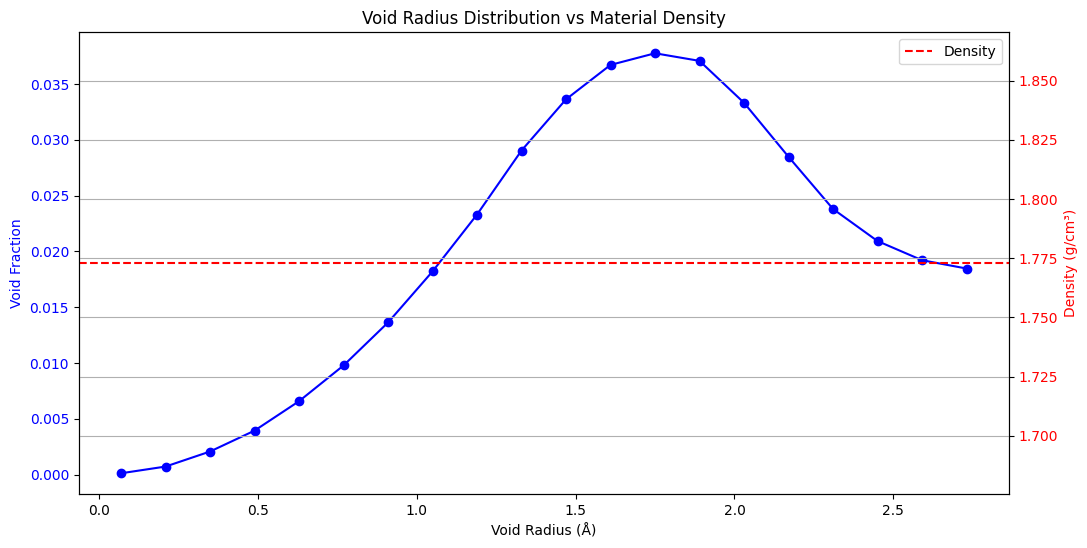

Material Density: 1.7729 g/cm³

Void Radius Distribution:
Radius 0.07 Å: Void Fraction 0.000124
Radius 0.21 Å: Void Fraction 0.000725
Radius 0.35 Å: Void Fraction 0.002073
Radius 0.49 Å: Void Fraction 0.003944
Radius 0.63 Å: Void Fraction 0.006582
Radius 0.77 Å: Void Fraction 0.009784
Radius 0.91 Å: Void Fraction 0.013636
Radius 1.05 Å: Void Fraction 0.018210
Radius 1.19 Å: Void Fraction 0.023310
Radius 1.33 Å: Void Fraction 0.029046
Radius 1.47 Å: Void Fraction 0.033634
Radius 1.61 Å: Void Fraction 0.036718
Radius 1.75 Å: Void Fraction 0.037761
Radius 1.89 Å: Void Fraction 0.037079
Radius 2.03 Å: Void Fraction 0.033323
Radius 2.17 Å: Void Fraction 0.028483
Radius 2.31 Å: Void Fraction 0.023807
Radius 2.45 Å: Void Fraction 0.020933
Radius 2.59 Å: Void Fraction 0.019216
Radius 2.73 Å: Void Fraction 0.018472


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, Delaunay, cKDTree
import matplotlib.pyplot as plt

def calculate_void_distribution(df, spacing=0.3, max_radius=2.8, bins=20):
    points = df[['X','Y','Z']].values


    min_coords = points.min(axis=0) - 5
    max_coords = points.max(axis=0) + 5
    x = np.arange(min_coords[0], max_coords[0], spacing)
    y = np.arange(min_coords[1], max_coords[1], spacing)
    z = np.arange(min_coords[2], max_coords[2], spacing)
    xx, yy, zz = np.meshgrid(x, y, z)
    mesh_points = np.vstack((xx.ravel(), yy.ravel(), zz.ravel())).T


    tree = cKDTree(points)
    distances, _ = tree.query(mesh_points)

    elements = df['Atom'].unique() if 'Atom' in df.columns else ['Ge', 'Sb', 'Te']
    atomic_masses = {'Ge': 72.64, 'Sb': 121.76, 'Te': 127.6}

    if 'Atom' in df.columns and 'Mass' not in df.columns:
        df['Mass'] = df['Atom'].map(atomic_masses)
    total_mass = df['Mass'].sum() if 'Mass' in df.columns else len(df) * np.mean(list(atomic_masses.values()))

    total_volume = np.prod(max_coords - min_coords)
    density = (total_mass / total_volume) * (1e24 / 6.022e23)
    radius_bins = np.linspace(0, max_radius, bins+1)
    radius_centers = (radius_bins[:-1] + radius_bins[1:]) / 2

    void_volumes = []
    for i in range(len(radius_bins)-1):
        mask = (distances > radius_bins[i]) & (distances <= radius_bins[i+1])
        void_volumes.append(np.sum(mask) * (spacing**3))

    void_fractions = np.array(void_volumes) / total_volume

    return radius_centers, void_fractions, density

radius_centers, void_fractions, density = calculate_void_distribution(df)

plt.figure(figsize=(12, 6))

plt.plot(radius_centers, void_fractions, 'bo-', label='Void Fraction')
plt.xlabel('Void Radius (Å)')
plt.ylabel('Void Fraction', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

ax2 = plt.gca().twinx()
ax2.axhline(y=density, color='r', linestyle='--', label='Density')
ax2.set_ylabel('Density (g/cm³)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Void Radius Distribution vs Material Density')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Material Density: {density:.4f} g/cm³")
print("\nVoid Radius Distribution:")
for r, vf in zip(radius_centers, void_fractions):
    print(f"Radius {r:.2f} Å: Void Fraction {vf:.6f}")

In [ ]:
from scipy.spatial import cKDTree
from scipy.stats import lognorm
from scipy.optimize import curve_fit

def calculate_void_distribution(df,spacing=0.3,radius=2.8,bins=20):
  points = df[['X','Y','Z']].values
  min_coords = points.min(axis = 0) - 5
  max_coords = points.max(axis = 0) + 5
  x = np.arange(min_coords[0],max_coords[0],spacing)
  y = np.arange(min_coords[1],max_coords[1],spacing)
  z = np.arange(min_coords[2],max_coords[2],spacing)
  xx,yy,zz = np.meshgrid(x,y,x)
  mesh_points = np.vstack((xx.ravel(),yy.ravel(),zz.ravel())).T
  tree = cKDTree(points)
  distances,_ = tree.query(mesh_points)
  distances = distances[distances > 0.1]
  return distances

void_distances = calculate_void_distribution(df)

In [ ]:
def lognormal_pdf(x,sigma,mu):
  return (1/(sigma*x*np.sqrt(2*np.pi)))*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2))
hist, bin_edges = np.histogram(void_distances,bins=50,density=True)

In [ ]:
p0 = [np.std(np.log(void_distances)),np.mean(np.log(void_distances))]
params,pcov = curve_fit(lognormal_pdf,bin_edges[:-1],hist,p0=p0)
sigma,mu = params

x_fit = np.linspace(0.1,np.max(void_distances),500)
y_fit = lognormal_pdf(x_fit,sigma,mu)

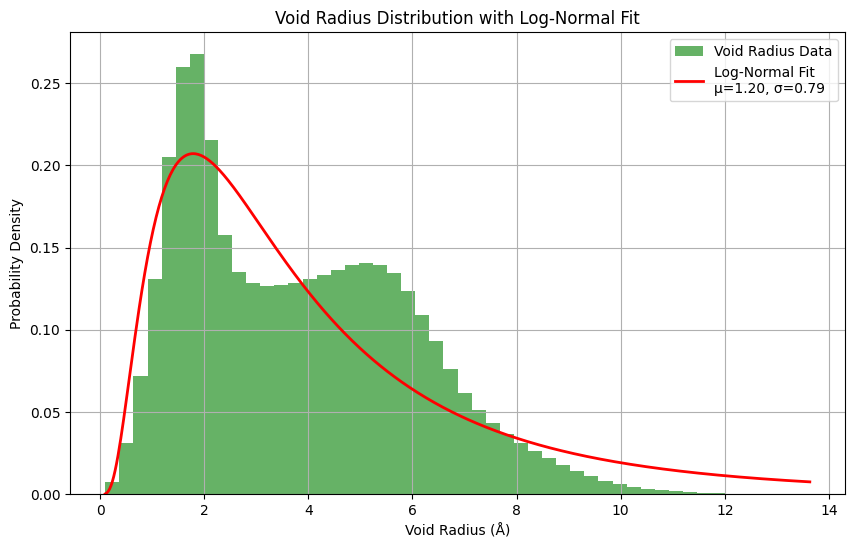

Fitted Log-Normal Parameters:
μ (log mean) = 1.2038
σ (log std dev) = 0.7890
Mean radius = 4.5496 Å
Median radius = 3.3327 Å
Mode radius = 1.7883 Å


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(void_distances, bins=50, density=True, alpha=0.6, color='g', label='Void Radius Data')
plt.plot(x_fit, y_fit, 'r-', linewidth=2, label=f'Log-Normal Fit\nμ={mu:.2f}, σ={sigma:.2f}')
plt.xlabel('Void Radius (Å)')
plt.ylabel('Probability Density')
plt.title('Void Radius Distribution with Log-Normal Fit')
plt.legend()
plt.grid(True)
plt.savefig('log_normal.png',dpi=400)
plt.show()

# Print fitted parameters
print(f"Fitted Log-Normal Parameters:")
print(f"μ (log mean) = {mu:.4f}")
print(f"σ (log std dev) = {sigma:.4f}")
print(f"Mean radius = {np.exp(mu + sigma**2/2):.4f} Å")
print(f"Median radius = {np.exp(mu):.4f} Å")
print(f"Mode radius = {np.exp(mu - sigma**2):.4f} Å")

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi,Delaunay
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/content/glass_GST_1.csv')
def calculate_void_space(df,spacing=0.3,cutoff=2.8):
  points = df[['X','Y','Z']].values
  vor = Voronoi(points)
  min_coords = points.min(axis=0) - 5 ## buffer
  max_coords = points.max(axis=0) + 5 ## buffer
  x = np.arange(min_coords[0],max_coords[0],spacing)
  y = np.arange(min_coords[1],max_coords[1],spacing)
  z = np.arange(min_coords[2],max_coords[2],spacing)
  xx , yy , zz = np.meshgrid(x,y,z)
  mesh_points = np.vstack((xx.ravel(),yy.ravel(),zz.ravel())).T

  ## calculating distance to nearest atom for each mesh point

  delaunay = Delaunay(points)
  simplex = delaunay.find_simplex(mesh_points)
  vertices = delaunay.simplices # Removed this incorrect line

  valid = simplex >=0
  dist = np.full(mesh_points.shape[0],np.inf)

  if np.any(valid):
    for p,s in zip(mesh_points[valid],simplex[valid]):
      # Use delaunay.simplices[s] to get indices and then index points
      tetra = points[delaunay.simplices[s]]
      distances = np.linalg.norm(tetra - p,axis=1)
      dist[valid] = np.minimum(dist[valid],np.min(distances,axis=0))
  outside = ~valid
  if np.any(outside):
    from scipy.spatial import cKDTree
    tree = cKDTree(points)
    dist[outside],_ = tree.query(mesh_points[outside])
  void_points = mesh_points[dist > cutoff]
  total_volume = np.prod(max_coords - min_coords)
  void_volume = len(void_points)*(spacing**3)
  void_fraction = void_volume / total_volume
  return void_volume,void_fraction,void_points
void_vol, void_frac, void_points = calculate_void_space(df, spacing=0.3, cutoff=2.8)

Total void volume: 20461.90 Å³
Void fraction: 0.6079


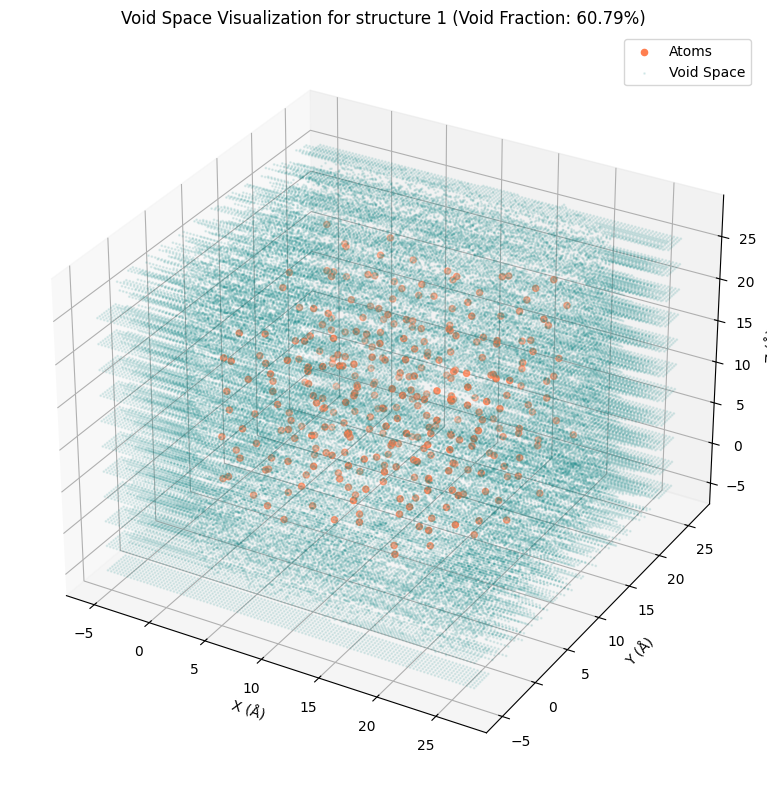

In [ ]:
print(f"Total void volume: {void_vol:.2f} Å³")
print(f"Void fraction: {void_frac:.4f}")

# Optional visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot atoms
ax.scatter(df['X'], df['Y'], df['Z'], c='coral', s=20, label='Atoms')

# Plot void points (sample every 10th point for clarity)
if len(void_points) > 0:
    ax.scatter(void_points[::10, 0], void_points[::10, 1], void_points[::10, 2],
               c='teal', s=1, alpha=0.1, label='Void Space')

ax.set_xlabel('X (Å)')
ax.set_ylabel('Y (Å)')
ax.set_zlabel('Z (Å)')
ax.legend()
plt.title(f'Void Space Visualization for structure 1 (Void Fraction: {void_frac:.2%})')
plt.tight_layout()
plt.savefig("void_space_visualization_1.png", dpi=300)
plt.show()

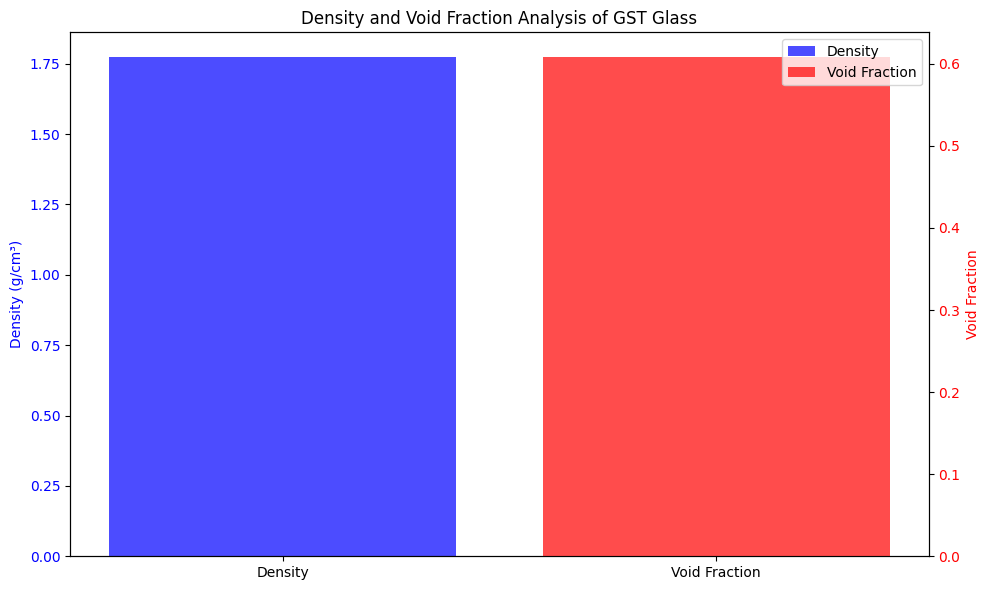

Density: 1.77 g/cm³
Void Fraction: 0.6079
Void Volume: 20461.90 Å³


In [ ]:
elements = df['Atom'].unique()
atomic_masses = {'Ge': 72.64, 'Sb': 121.76, 'Te': 127.6}

if 'Atom' in df.columns and 'Mass' not in df.columns:
    df['Mass'] = df['Atom'].map(atomic_masses)
total_mass = df['Mass'].sum()

min_coords = df[['X','Y','Z']].values.min(axis=0) - 5
max_coords = df[['X','Y','Z']].values.max(axis=0) + 5
total_volume = np.prod(max_coords - min_coords)

density = (total_mass / total_volume) * (1e24 / 6.022e23)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar('Density', density, color='blue', alpha=0.7, label='Density')
ax1.set_ylabel('Density (g/cm³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar('Void Fraction', void_frac, color='red', alpha=0.7, label='Void Fraction')
ax2.set_ylabel('Void Fraction', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Density and Void Fraction Analysis of GST Glass')
fig.tight_layout()

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

print(f"Density: {density:.2f} g/cm³")
print(f"Void Fraction: {void_frac:.4f}")
print(f"Void Volume: {void_vol:.2f} Å³")

#**$(FORBIDDEN)$Older Trials (Coordination Number & RDF)**

In [ ]:
import pandas as pd
import numpy as np
with open('/content/glass_GST_1.xyz','r') as f:
  lines = f.readlines()[2:]
data = []
for line in lines:
  parts = line.split()
  if len(parts) == 4:
    data.append(parts)
df = pd.DataFrame(data,columns=['atom','x','y','z'])

# Convert coordinate columns to numeric
df[['x', 'y', 'z']] = df[['x', 'y', 'z']].apply(pd.to_numeric)

# df.to_csv("GST_specific_G-G", index = False)
### Working on 6 M-M combinations in the space ###
df_ge = df[df['atom'] == 'Ge'].copy()
df_ge.reset_index(drop=True, inplace=True)
df_sb = df[df['atom'] == 'Sb'].copy()
df_sb.reset_index(drop=True, inplace=True)
df_te = df[df['atom'] == 'Te'].copy()
df_te.reset_index(drop=True, inplace=True)
def dist_calc(x1,x2,y1,y2,z2,z3):
  return ((x1-x2)**2 + (y1-y2)**2 + (z2-z3)**2)**0.5
### Distance observation ###
df_ge_ge = np.zeros((len(df_ge),len(df_ge)))
df_ge_sb = np.zeros((len(df_ge),len(df_sb)))
df_ge_te = np.zeros((len(df_ge),len(df_te)))
df_sb_sb = np.zeros((len(df_sb),len(df_sb)))
df_sb_te = np.zeros((len(df_sb),len(df_te)))
df_te_te = np.zeros((len(df_te),len(df_te)))
for i in range(len(df_ge)):
  for j in range(len(df_ge)):
    df_ge_ge[i,j] = dist_calc(df_ge.loc[i,'x'],df_ge.loc[j,'x'],df_ge.loc[i,'y'],df_ge.loc[j,'y'],df_ge.loc[i,'z'],df_ge.loc[j,'z'])
for i in range(len(df_ge)):
  for j in range(len(df_te)):
    df_ge_te[i,j] = dist_calc(df_ge.loc[i,'x'],df_te.loc[j,'x'],df_ge.loc[i,'y'],df_te.loc[j,'y'],df_ge.loc[i,'z'],df_te.loc[j,'z'])
for i in range(len(df_ge)):
  for j in range(len(df_sb)):
    df_ge_sb[i,j] = dist_calc(df_ge.loc[i,'x'],df_sb.loc[j,'x'],df_ge.loc[i,'y'],df_sb.loc[j,'y'],df_ge.loc[i,'z'],df_sb.loc[j,'z'])
for i in range(len(df_sb)):
  for j in range(len(df_sb)):
    df_sb_sb[i,j] = dist_calc(df_sb.loc[i,'x'],df_sb.loc[j,'x'],df_sb.loc[i,'y'],df_sb.loc[j,'y'],df_sb.loc[i,'z'],df_sb.loc[j,'z'])
for i in range(len(df_sb)):
  for j in range(len(df_te)):
    df_sb_te[i,j] = dist_calc(df_sb.loc[i,'x'],df_te.loc[j,'x'],df_sb.loc[i,'y'],df_te.loc[j,'y'],df_sb.loc[i,'z'],df_te.loc[j,'z'])
for i in range(len(df_te)):
  for j in range(len(df_te)):
    df_te_te[i,j] = dist_calc(df_te.loc[i,'x'],df_te.loc[j,'x'],df_te.loc[i,'y'],df_te.loc[j,'y'],df_te.loc[i,'z'],df_te.loc[j,'z'])

######## Working on Partial pair distribution function ########
def calc_r_v(df_1):
  sum_r = 0
  temp_r = 0
  # temp_r = np.zeros((df_1.shape[0],df_1.shape[1]))
  r_x,r_y = df_1.shape[0],df_1.shape[1]
  for i in range(r_x):
    for j in range(r_y):
      sum_r += df_1[i][j]
  avg_r = sum_r/(r_x*r_y)
  for i in range(df_1.shape[0]):
    for j in range(df_1.shape[1]):
      temp_r = temp_r + (df_1[i][j] - avg_r)**2
  beta_v = np.sqrt(temp_r/(r_x*r_y))
  return beta_v,avg_r
beta_ge_ge , rv_ge_ge = calc_r_v(df_ge_ge)
beta_ge_sb , rv_ge_sb = calc_r_v(df_ge_sb)
beta_ge_te , rv_ge_te = calc_r_v(df_ge_te)
beta_sb_sb , rv_sb_sb = calc_r_v(df_sb_sb)
beta_sb_te , rv_sb_te = calc_r_v(df_sb_te)
beta_te_te , rv_te_te = calc_r_v(df_te_te)

######## Coordination number calculation from clustering data ############# (FOR EACH SPECIES)
def dataframe_cont(matrix):
  m,n = matrix.shape
  data = []
  for i in range(m):
    for j in range(n):
      if i != j or m != n :
        data.append((i , j , matrix[i , j]))
  df = pd.DataFrame(data,columns=['i','j','value'])
  return df
cont_ge_ge = dataframe_cont(df_ge_ge)
cont_ge_sb = dataframe_cont(df_ge_sb)
cont_ge_te = dataframe_cont(df_ge_te)
cont_sb_sb = dataframe_cont(df_sb_sb)
cont_sb_te = dataframe_cont(df_sb_te)
cont_te_te = dataframe_cont(df_te_te)
# def coordination_calc(data):
import numpy as np
# from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances

#### Distance matrix made ####

def coordination_calc(data):
  n_atoms = max(max(data['i']), max(data['j'])) + 1
  distance_matrix = np.zeros((n_atoms, n_atoms))
  for _,row in data.iterrows():
    i,j, value = int(row['i']), int(row['j']), row['value']
    distance_matrix[i,j] = value
    distance_matrix[j,i] = value
  cut_off = np.ceil(np.min(data['value']))
  coordination_number = []
  for i in range(n_atoms):
    neighbors = np.sum((distance_matrix[i] > 0) & (distance_matrix[i] <= cut_off))
    coordination_number.append(neighbors)
  return coordination_number
def coord_fin(c_cont):
  c = 0
  c_cont = np.array(c_cont)
  for j in range(len(c_cont)):
    if c_cont[j] == 1:
      c+=1
  return c
#### Calculation for the fraction vs coordination number ####
c_cont_temp = [cont_ge_ge,cont_ge_sb,cont_ge_te,cont_sb_sb,cont_sb_te,cont_te_te]
coord_tot = []
for j in c_cont_temp:
  c_cont = coordination_calc(j)
  c_tempo = coord_fin(c_cont)
  coord_tot.append(c_tempo)
sum = 0
y = [_ for j in range(len(coord_tot))]
for i in range(len(coord_tot)):
  y[i] = (coord_tot[i]/np.sum(coord_tot))*100

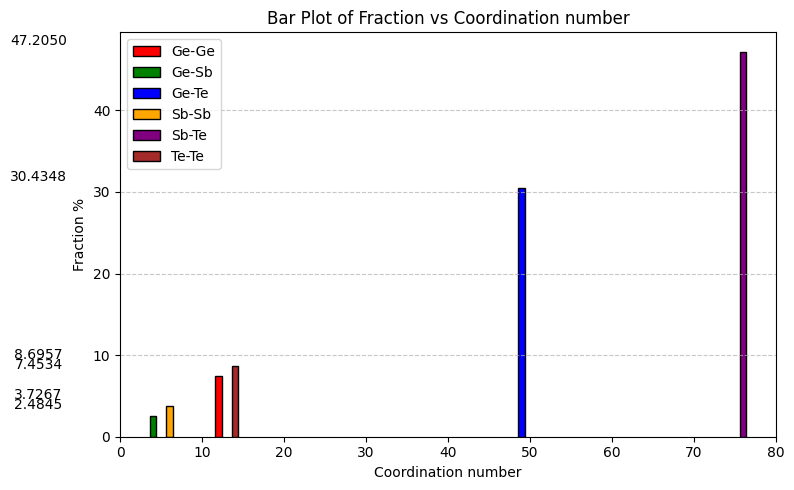

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8, 5))
colors = ['red','green','blue','orange','purple','brown']
labels = ['Ge-Ge','Ge-Sb','Ge-Te','Sb-Sb','Sb-Te','Te-Te']
bars = []
for i,(cat,val,col,lab) in enumerate(zip(coord_tot, y, colors, labels)):
  bar = plt.bar(cat,val, color = col, edgecolor = 'black', label =lab)
for i, val in enumerate(y):
  plt.text(cat-24, val + 0.5, f'{val:.4f}', ha='center', va='bottom') # Corrected f-string and text position
plt.xlabel('Coordination number')
plt.ylabel('Fraction %')
plt.title('Bar Plot of Fraction vs Coordination number')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("bar_plot.png", dpi=300)
plt.show()

In [ ]:
from scipy.optimize import minimize

def g_ij_calc(r,r_v, beta_v, Z , q0):
  denom = Z/(np.sqrt(32*np.pi**3*q0)*beta_v*r_v*r)
  exp1 = np.exp(-(r - r_v)**2/(2*beta_v**2))
  exp2 = np.exp(-(r + r_v)**2/(2*beta_v**2))
  return denom*(exp1 - exp2)
def optimize_q0(cont_ge_ge,Z,r_v,beta_v,r_values = None):
  def objective(q0):
    return -g_ij_calc(r_values,r_v,beta_v,Z,q0)
  q0_initial = 1
  bounds = [(1e-6, None)]
  result = minimize(objective, x0=q0_initial, method = 'L-BFGS-B',bounds=bounds)
  if result.success:
    optimized_q0 = result.x[0]
    return optimized_q0
  else:
    raise RuntimeError("Optimization failed")
######### Execution ############
final_q0 = [_ for i in range(6)]
if __name__ == '__main__':
  r_target = np.min(cont_ge_ge['value'])
  final_q0[0] = optimize_q0(cont_ge_ge,coord_tot[0],rv_ge_ge,beta_ge_ge,r_target)
  r_target = np.min(cont_ge_sb['value'])
  final_q0[1] = optimize_q0(cont_ge_sb,coord_tot[1],rv_ge_sb,beta_ge_sb,r_target)
  r_target = np.min(cont_ge_te['value'])
  final_q0[2] = optimize_q0(cont_ge_te,coord_tot[2],rv_ge_te,beta_ge_te,r_target)
  r_target = np.min(cont_sb_sb['value'])
  final_q0[3] = optimize_q0(cont_sb_sb,coord_tot[3],rv_sb_sb,beta_sb_sb,r_target)
  r_target = np.min(cont_sb_te['value'])
  final_q0[4] = optimize_q0(cont_sb_te,coord_tot[4],rv_sb_te,beta_sb_te,r_target)
  r_target = np.min(cont_te_te['value'])
  final_q0[5] = optimize_q0(cont_te_te,coord_tot[5],rv_te_te,beta_te_te,r_target)

In [ ]:
######### Forming 1D arrays for the operation ############
G_ge_ge = [0] * len(cont_ge_ge['value'])
G_ge_sb = [0] * len(cont_ge_sb['value'])
G_ge_te = [0] * len(cont_ge_te['value'])
G_sb_sb = [0] * len(cont_sb_sb['value'])
G_sb_te = [0] * len(cont_sb_te['value'])
G_te_te = [0] * len(cont_te_te['value'])

In [ ]:
# Calculate G_ij values by iterating through the rows of the cont_ dataframes
for index, row in cont_ge_ge.iterrows():
    i, j, value = int(row['i']), int(row['j']), row['value']
    G_ge_ge[index] = g_ij_calc(value, rv_ge_ge, beta_ge_ge, coord_tot[0], final_q0[0])

for index, row in cont_ge_sb.iterrows():
    i, j, value = int(row['i']), int(row['j']), row['value']
    G_ge_sb[index] = g_ij_calc(value, rv_ge_sb, beta_ge_sb, coord_tot[1], final_q0[1])

for index, row in cont_ge_te.iterrows():
    i, j, value = int(row['i']), int(row['j']), row['value']
    G_ge_te[index] = g_ij_calc(value, rv_ge_te, beta_ge_te, coord_tot[2], final_q0[2])

for index, row in cont_sb_sb.iterrows():
    i, j, value = int(row['i']), int(row['j']), row['value']
    G_sb_sb[index] = g_ij_calc(value, rv_sb_sb, beta_sb_sb, coord_tot[3], final_q0[3])

for index, row in cont_sb_te.iterrows():
    i, j, value = int(row['i']), int(row['j']), row['value']
    G_sb_te[index] = g_ij_calc(value, rv_sb_te, beta_sb_te, coord_tot[4], final_q0[4])

for index, row in cont_te_te.iterrows():
    i, j, value = int(row['i']), int(row['j']), row['value']
    G_te_te[index] = g_ij_calc(value, rv_te_te, beta_te_te, coord_tot[5], final_q0[5])

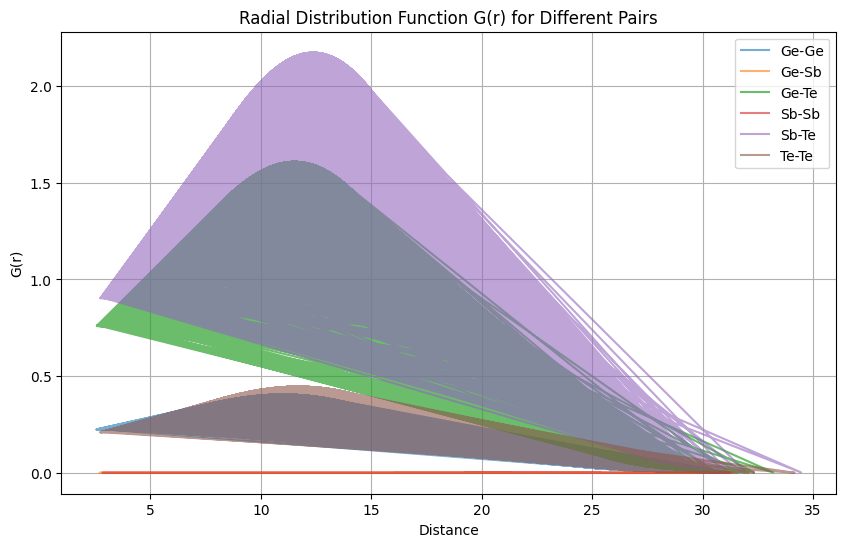

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(cont_ge_ge['value'], G_ge_ge, label='Ge-Ge', alpha=0.6)

plt.plot(cont_ge_sb['value'], G_ge_sb, label='Ge-Sb', alpha=0.6)

plt.plot(cont_ge_te['value'], G_ge_te, label='Ge-Te', alpha=0.7)

plt.plot(cont_sb_sb['value'], G_sb_sb, label='Sb-Sb', alpha=0.6)

plt.plot(cont_sb_te['value'], G_sb_te, label='Sb-Te', alpha=0.6)

plt.plot(cont_te_te['value'], G_te_te, label='Te-Te', alpha=0.6)

plt.xlabel('Distance')
plt.ylabel('G(r)')
plt.title('Radial Distribution Function G(r) for Different Pairs')
plt.legend()
plt.grid(True)
plt.savefig("Partial Pair Distribution function", dpi = 300)
plt.show()

**LD Calculation**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

df = pd.read_csv("/content/glass_GST_1.csv")
data_pos = []
data_neg = []
for i in range(len(df)):
  if df.loc[i,'cluster'] == -1:
    data_neg.append((df.loc[i,'Atom'],df.loc[i,'X'],df.loc[i,'Y'],df.loc[i,'Z']))
  elif df.loc[i,'cluster'] > -1:
    data_pos.append((df.loc[i,'Atom'],df.loc[i,'X'],df.loc[i,'Y'],df.loc[i,'Z']))
df_pos = pd.DataFrame(data_pos,columns=['Atom','x','y','z'])
df_neg = pd.DataFrame(data_neg,columns=['Atom','x','y','z'])
df_pos[['x','y','z']] = df_pos[['x','y','z']].apply(pd.to_numeric)
df_neg[['x','y','z']] = df_neg[['x','y','z']].apply(pd.to_numeric)
def dist_calc(x1,x2,y1,y2,z1,z2):
  return ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
df_pos_ge = df_pos[df_pos['Atom'] == 'Ge'].copy()
df_neg_ge = df_neg[df_neg['Atom'] == 'Ge'].copy()
df_pos_ge.reset_index(drop=True , inplace =True)
df_neg_ge.reset_index(drop=True , inplace =True)
df_pos_sb = df_pos[df_pos['Atom'] == 'Sb'].copy()
df_neg_sb = df_neg[df_neg['Atom'] == 'Sb'].copy()
df_pos_sb.reset_index(drop=True , inplace =True)
df_neg_sb.reset_index(drop=True , inplace =True)
df_pos_te = df_pos[df_pos['Atom'] == 'Te'].copy()
df_neg_te = df_neg[df_neg['Atom'] == 'Te'].copy()
df_pos_te.reset_index(drop=True , inplace =True)
df_neg_te.reset_index(drop=True , inplace =True)
df_pos_ge_ge = np.zeros((len(df_pos_ge),len(df_pos_ge)))
df_pos_ge_sb = np.zeros((len(df_pos_ge),len(df_pos_sb)))
df_pos_ge_te = np.zeros((len(df_pos_ge),len(df_pos_te)))
df_pos_sb_sb = np.zeros((len(df_pos_sb),len(df_pos_sb)))
df_pos_sb_te = np.zeros((len(df_pos_sb),len(df_pos_te)))
df_pos_te_te = np.zeros((len(df_pos_te),len(df_pos_te)))

df_neg_ge_ge = np.zeros((len(df_neg_ge),len(df_neg_ge)))
df_neg_ge_sb = np.zeros((len(df_neg_ge),len(df_neg_sb)))
df_neg_ge_te = np.zeros((len(df_neg_ge),len(df_neg_te)))
df_neg_sb_sb = np.zeros((len(df_neg_sb),len(df_neg_sb)))
df_neg_sb_te = np.zeros((len(df_neg_sb),len(df_neg_te)))
df_neg_te_te = np.zeros((len(df_neg_te),len(df_neg_te)))


for i in range(len(df_neg_ge)):
  for j in range(len(df_neg_ge)):
    df_neg_ge_ge[i,j] = dist_calc(df_neg_ge.loc[i,'x'],df_neg_ge.loc[j,'x'],df_neg_ge.loc[i,'y'],df_neg_ge.loc[j,'y'],df_neg_ge.loc[i,'z'],df_neg_ge.loc[j,'z'])
for i in range(len(df_neg_ge)):
  for j in range(len(df_neg_sb)):
    df_neg_ge_sb[i,j] = dist_calc(df_neg_ge.loc[i,'x'],df_neg_sb.loc[j,'x'],df_neg_ge.loc[i,'y'],df_neg_sb.loc[j,'y'],df_neg_ge.loc[i,'z'],df_neg_sb.loc[j,'z'])
for i in range(len(df_neg_ge)):
  for j in range(len(df_neg_te)):
    df_neg_ge_te[i,j] = dist_calc(df_neg_ge.loc[i,'x'],df_neg_te.loc[j,'x'],df_neg_ge.loc[i,'y'],df_neg_te.loc[j,'y'],df_neg_ge.loc[i,'z'],df_neg_te.loc[j,'z'])
for i in range(len(df_neg_sb)):
  for j in range(len(df_neg_sb)):
    df_neg_sb_sb[i,j] = dist_calc(df_neg_sb.loc[i,'x'],df_neg_sb.loc[j,'x'],df_neg_sb.loc[i,'y'],df_neg_sb.loc[j,'y'],df_neg_sb.loc[i,'z'],df_neg_sb.loc[j,'z'])
for i in range(len(df_neg_sb)):
  for j in range(len(df_neg_te)):
    df_neg_sb_te[i,j] = dist_calc(df_neg_sb.loc[i,'x'],df_neg_te.loc[j,'x'],df_neg_sb.loc[i,'y'],df_neg_te.loc[j,'y'],df_neg_sb.loc[i,'z'],df_neg_te.loc[j,'z'])
for i in range(len(df_neg_te)):
  for j in range(len(df_neg_te)):
    df_neg_te_te[i,j] = dist_calc(df_neg_te.loc[i,'x'],df_neg_te.loc[j,'x'],df_neg_te.loc[i,'y'],df_neg_te.loc[j,'y'],df_neg_te.loc[i,'z'],df_neg_te.loc[j,'z'])

def dataframe_cont(matrix):
  m,n = matrix.shape
  data = []
  for i in range(m):
    for j in range(n):
      if i != j or m!=n:
        data.append((i , j , matrix[i , j]))
  df = pd.DataFrame(data,columns=['i','j','value'])
  return df

cont_neg_ge_ge = dataframe_cont(df_neg_ge_ge)
cont_neg_ge_sb = dataframe_cont(df_neg_ge_sb)
cont_neg_ge_te = dataframe_cont(df_neg_ge_te)
cont_neg_sb_sb = dataframe_cont(df_neg_sb_sb)
cont_neg_sb_te = dataframe_cont(df_neg_sb_te)
cont_neg_te_te = dataframe_cont(df_neg_te_te)

import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

def coordination_calc(data):
  n_atoms = max(max(data['i']), max(data['j'])) + 1
  distance_matrix = np.zeros((n_atoms,n_atoms))
  for _,row in data.iterrows():
    i,j, value = int(row['i']) , int(row['j']) , row['value']
    distance_matrix[i,j] = value
    distance_matrix[j,i] = value
  cut_off = np.ceil(np.min(data['value']))
  coordination_number = []
  for i in range(n_atoms):
    neighbors = np.sum((distance_matrix[i] > 0) & (distance_matrix[i] <= cut_off))
    coordination_number.append(neighbors)
  return coordination_number

def coord_fin(c_cont):
  c = 0
  c_cont = np.array(c_cont)
  for j in range(len(c_cont)):
    if c_cont[j] == 1:
      c+=1
  return c

#### Calculation for the fraction vs coordination number ####
c_cont_temp = [cont_neg_ge_ge,cont_neg_ge_sb,cont_neg_ge_te,cont_neg_sb_sb,cont_neg_sb_te,cont_neg_te_te]
coord_tot = []
for j in c_cont_temp:
  c_cont = coordination_calc(j)
  c_tempo = coord_fin(c_cont)
  coord_tot.append(c_tempo)

def calc_r_v(df_1):
  sum_r = 0
  temp_r = 0
  # temp_r = np.zeros((df_1.shape[0],df_1.shape[1]))
  r_x,r_y = df_1.shape[0],df_1.shape[1]
  for i in range(r_x):
    for j in range(r_y):
      sum_r += df_1[i][j]
  avg_r = sum_r/(r_x*r_y)
  for i in range(df_1.shape[0]):
    for j in range(df_1.shape[1]):
      temp_r = temp_r + (df_1[i][j] - avg_r)**2
  beta_v = np.sqrt(temp_r/(r_x*r_y))
  return beta_v,avg_r

beta_ge_ge , rv_ge_ge = calc_r_v(df_neg_ge_ge)
beta_ge_sb , rv_ge_sb = calc_r_v(df_neg_ge_sb)
beta_ge_te , rv_ge_te = calc_r_v(df_neg_ge_te)
beta_sb_sb , rv_sb_sb = calc_r_v(df_neg_sb_sb)
beta_sb_te , rv_sb_te = calc_r_v(df_neg_sb_te)
beta_te_te , rv_te_te = calc_r_v(df_neg_te_te)

from scipy.optimize import minimize

def g_ij_calc(r,r_v,beta_v,Z,q0):
  denom = Z/(np.sqrt(32*np.pi**3*q0)*beta_v*r_v*r)
  exp1 = np.exp(-(r-r_v)**2/(2*beta_v**2))
  exp2 = np.exp(-(r+r_v)**2/(2*beta_v**2))
  return denom*(exp1 - exp2)

def optimize_q0(cont_ge_ge,Z,r_v,beta_v,r_values = None):
  def objective(q0):
    return -g_ij_calc(r_values,r_v,beta_v,Z,q0)
  q0_initial = 1
  bounds = [(1e-6, None)]
  result = minimize(objective, x0=q0_initial, method = 'L-BFGS-B', bounds = bounds)
  if result.success:
    optimized_q0 = result.x[0]
    return optimized_q0
  else:
    raise RuntimeError("Optimization failed")

##### Forming the 1D arrays for the operation
G_neg_ge_ge = [0] * len(cont_neg_ge_ge['value'])
G_neg_ge_sb = [0] * len(cont_neg_ge_sb['value'])
G_neg_ge_te = [0] * len(cont_neg_ge_te['value'])
G_neg_sb_sb = [0] * len(cont_neg_sb_sb['value'])
G_neg_sb_te = [0] * len(cont_neg_sb_te['value'])
G_neg_te_te = [0] * len(cont_neg_te_te['value'])

final_q0 = [_ for i in range(6)]
r_target = np.min(cont_neg_ge_ge['value'])
final_q0[0] = optimize_q0(cont_neg_ge_ge,coord_tot[0],rv_ge_ge,beta_ge_ge,r_target)
r_target = np.min(cont_neg_ge_sb['value'])
final_q0[1] = optimize_q0(cont_neg_ge_sb,coord_tot[1],rv_ge_sb,beta_ge_sb,r_target)
r_target = np.min(cont_neg_ge_te['value'])
final_q0[2] = optimize_q0(cont_neg_ge_te,coord_tot[2],rv_ge_te,beta_ge_te,r_target)
r_target = np.min(cont_neg_sb_sb['value'])
final_q0[3] = optimize_q0(cont_neg_sb_sb,coord_tot[3],rv_sb_sb,beta_sb_sb,r_target)
r_target = np.min(cont_neg_sb_te['value'])
final_q0[4] = optimize_q0(cont_neg_sb_te,coord_tot[4],rv_sb_te,beta_sb_te,r_target)
r_target = np.min(cont_neg_te_te['value'])
final_q0[5] = optimize_q0(cont_neg_te_te,coord_tot[5],rv_te_te,beta_te_te,r_target)

for index,row in cont_neg_ge_ge.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_neg_ge_ge[index] = g_ij_calc(value,rv_ge_ge,beta_ge_ge,coord_tot[0],final_q0[0])
for index,row in cont_neg_ge_sb.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_neg_ge_sb[index] = g_ij_calc(value,rv_ge_sb,beta_ge_sb,coord_tot[1],final_q0[1])
for index,row in cont_neg_ge_te.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_neg_ge_te[index] = g_ij_calc(value,rv_ge_te,beta_ge_te,coord_tot[2],final_q0[2])
for index,row in cont_neg_sb_sb.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_neg_sb_sb[index] = g_ij_calc(value,rv_sb_sb,beta_sb_sb,coord_tot[3],final_q0[3])
for index,row in cont_neg_sb_te.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_neg_sb_te[index] = g_ij_calc(value,rv_sb_te,beta_sb_te,coord_tot[4],final_q0[4])
for index,row in cont_neg_te_te.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_neg_te_te[index] = g_ij_calc(value,rv_te_te,beta_te_te,coord_tot[5],final_q0[5])

**HD-Phase**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

df = pd.read_csv("/content/glass_GST_1.csv")
data_pos = []
data_neg = []
for i in range(len(df)):
  if df.loc[i,'cluster'] == -1:
    data_neg.append((df.loc[i,'Atom'],df.loc[i,'X'],df.loc[i,'Y'],df.loc[i,'Z']))
  elif df.loc[i,'cluster'] > -1:
    data_pos.append((df.loc[i,'Atom'],df.loc[i,'X'],df.loc[i,'Y'],df.loc[i,'Z']))
df_pos = pd.DataFrame(data_pos,columns=['Atom','x','y','z'])
df_neg = pd.DataFrame(data_neg,columns=['Atom','x','y','z'])
df_pos[['x','y','z']] = df_pos[['x','y','z']].apply(pd.to_numeric)
df_neg[['x','y','z']] = df_neg[['x','y','z']].apply(pd.to_numeric)
def dist_calc(x1,x2,y1,y2,z1,z2):
  return ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
df_pos_ge = df_pos[df_pos['Atom'] == 'Ge'].copy()
df_neg_ge = df_neg[df_neg['Atom'] == 'Ge'].copy()
df_pos_ge.reset_index(drop=True , inplace =True)
df_neg_ge.reset_index(drop=True , inplace =True)
df_pos_sb = df_pos[df_pos['Atom'] == 'Sb'].copy()
df_neg_sb = df_neg[df_neg['Atom'] == 'Sb'].copy()
df_pos_sb.reset_index(drop=True , inplace =True)
df_neg_sb.reset_index(drop=True , inplace =True)
df_pos_te = df_pos[df_pos['Atom'] == 'Te'].copy()
df_neg_te = df_neg[df_neg['Atom'] == 'Te'].copy()
df_pos_te.reset_index(drop=True , inplace =True)
df_neg_te.reset_index(drop=True , inplace =True)
df_pos_ge_ge = np.zeros((len(df_pos_ge),len(df_pos_ge)))
df_pos_ge_sb = np.zeros((len(df_pos_ge),len(df_pos_sb)))
df_pos_ge_te = np.zeros((len(df_pos_ge),len(df_pos_te)))
df_pos_sb_sb = np.zeros((len(df_pos_sb),len(df_pos_sb)))
df_pos_sb_te = np.zeros((len(df_pos_sb),len(df_pos_te)))
df_pos_te_te = np.zeros((len(df_pos_te),len(df_pos_te)))


for i in range(len(df_pos_ge)):
  for j in range(len(df_pos_ge)):
    df_pos_ge_ge[i,j] = dist_calc(df_pos_ge.loc[i,'x'],df_pos_ge.loc[j,'x'],df_pos_ge.loc[i,'y'],df_pos_ge.loc[j,'y'],df_pos_ge.loc[i,'z'],df_pos_ge.loc[j,'z'])
for i in range(len(df_pos_ge)):
  for j in range(len(df_pos_sb)):
    df_pos_ge_sb[i,j] = dist_calc(df_pos_ge.loc[i,'x'],df_pos_sb.loc[j,'x'],df_pos_ge.loc[i,'y'],df_pos_sb.loc[j,'y'],df_pos_ge.loc[i,'z'],df_pos_sb.loc[j,'z'])
for i in range(len(df_pos_ge)):
  for j in range(len(df_pos_te)):
    df_pos_ge_te[i,j] = dist_calc(df_pos_ge.loc[i,'x'],df_pos_te.loc[j,'x'],df_pos_ge.loc[i,'y'],df_pos_te.loc[j,'y'],df_pos_ge.loc[i,'z'],df_pos_te.loc[j,'z'])
for i in range(len(df_pos_sb)):
  for j in range(len(df_pos_sb)):
    df_pos_sb_sb[i,j] = dist_calc(df_pos_sb.loc[i,'x'],df_pos_sb.loc[j,'x'],df_pos_sb.loc[i,'y'],df_pos_sb.loc[j,'y'],df_pos_sb.loc[i,'z'],df_pos_sb.loc[j,'z'])
for i in range(len(df_pos_sb)):
  for j in range(len(df_pos_te)):
    df_pos_sb_te[i,j] = dist_calc(df_pos_sb.loc[i,'x'],df_pos_te.loc[j,'x'],df_pos_sb.loc[i,'y'],df_pos_te.loc[j,'y'],df_pos_sb.loc[i,'z'],df_pos_te.loc[j,'z'])
for i in range(len(df_pos_te)):
  for j in range(len(df_pos_te)):
    df_pos_te_te[i,j] = dist_calc(df_pos_te.loc[i,'x'],df_pos_te.loc[j,'x'],df_pos_te.loc[i,'y'],df_pos_te.loc[j,'y'],df_pos_te.loc[i,'z'],df_pos_te.loc[j,'z'])
def dataframe_cont(matrix):
  m,n = matrix.shape
  data = []
  for i in range(m):
    for j in range(n):
      if i != j or m!=n:
        data.append((i , j , matrix[i , j]))
  df = pd.DataFrame(data,columns=['i','j','value'])
  return df
cont_pos_ge_ge = dataframe_cont(df_pos_ge_ge)
cont_pos_ge_sb = dataframe_cont(df_pos_ge_sb)
cont_pos_ge_te = dataframe_cont(df_pos_ge_te)
cont_pos_sb_sb = dataframe_cont(df_pos_sb_sb)
cont_pos_sb_te = dataframe_cont(df_pos_sb_te)
cont_pos_te_te = dataframe_cont(df_pos_te_te)

import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

def coordination_calc(data):
  n_atoms = max(max(data['i']), max(data['j'])) + 1
  distance_matrix = np.zeros((n_atoms,n_atoms))
  for _,row in data.iterrows():
    i,j, value = int(row['i']) , int(row['j']) , row['value']
    distance_matrix[i,j] = value
    distance_matrix[j,i] = value
  cut_off = np.ceil(np.min(data['value']))
  coordination_number = []
  for i in range(n_atoms):
    neighbors = np.sum((distance_matrix[i] > 0) & (distance_matrix[i] <= cut_off))
    coordination_number.append(neighbors)
  return coordination_number
def coord_fin(c_cont):
  c = 0
  c_cont = np.array(c_cont)
  for j in range(len(c_cont)):
    if c_cont[j] == 1:
      c+=1
  return c
#### Calculation for the fraction vs coordination number ####
c_cont_temp = [cont_pos_ge_ge,cont_pos_ge_sb,cont_pos_ge_te,cont_pos_sb_sb,cont_pos_sb_te,cont_pos_te_te]
coord_tot = []
for j in c_cont_temp:
  c_cont = coordination_calc(j)
  c_tempo = coord_fin(c_cont)
  coord_tot.append(c_tempo)

def calc_r_v(df_1):
  sum_r = 0
  temp_r = 0
  # temp_r = np.zeros((df_1.shape[0],df_1.shape[1]))
  r_x,r_y = df_1.shape[0],df_1.shape[1]
  for i in range(r_x):
    for j in range(r_y):
      sum_r += df_1[i][j]
  avg_r = sum_r/(r_x*r_y)
  for i in range(df_1.shape[0]):
    for j in range(df_1.shape[1]):
      temp_r = temp_r + (df_1[i][j] - avg_r)**2
  beta_v = np.sqrt(temp_r/(r_x*r_y))
  return beta_v,avg_r
beta_ge_ge , rv_ge_ge = calc_r_v(df_pos_ge_ge)
beta_ge_sb , rv_ge_sb = calc_r_v(df_pos_ge_sb)
beta_ge_te , rv_ge_te = calc_r_v(df_pos_ge_te)
beta_sb_sb , rv_sb_sb = calc_r_v(df_pos_sb_sb)
beta_sb_te , rv_sb_te = calc_r_v(df_pos_sb_te)
beta_te_te , rv_te_te = calc_r_v(df_pos_te_te)
from scipy.optimize import minimize

def g_ij_calc(r,r_v,beta_v,Z,q0):
  denom = Z/(np.sqrt(32*np.pi**3*q0)*beta_v*r_v*r)
  exp1 = np.exp(-(r-r_v)**2/(2*beta_v**2))
  exp2 = np.exp(-(r+r_v)**2/(2*beta_v**2))
  return denom*(exp1 - exp2)
def optimize_q0(cont_ge_ge,Z,r_v,beta_v,r_values = None):
  def objective(q0):
    return -g_ij_calc(r_values,r_v,beta_v,Z,q0)
  q0_initial = 1
  bounds = [(1e-6, None)]
  result = minimize(objective, x0=q0_initial, method = 'L-BFGS-B', bounds = bounds)
  if result.success:
    optimized_q0 = result.x[0]
    return optimized_q0
  else:
    raise RuntimeError("Optimization failed")
from scipy.optimize import minimize
##### Forming the 1D arrays for the operation
G_pos_ge_ge = [0] * len(cont_pos_ge_ge['value'])
G_pos_ge_sb = [0] * len(cont_pos_ge_sb['value'])
G_pos_ge_te = [0] * len(cont_pos_ge_te['value'])
G_pos_sb_sb = [0] * len(cont_pos_sb_sb['value'])
G_pos_sb_te = [0] * len(cont_pos_sb_te['value'])
G_pos_te_te = [0] * len(cont_pos_te_te['value'])
final_q0 = [_ for i in range(6)]
r_target = np.min(cont_pos_ge_ge['value'])
final_q0[0] = optimize_q0(cont_pos_ge_ge,coord_tot[0],rv_ge_ge,beta_ge_ge,r_target)
r_target = np.min(cont_pos_ge_sb['value'])
final_q0[1] = optimize_q0(cont_pos_ge_sb,coord_tot[1],rv_ge_sb,beta_ge_sb,r_target)
r_target = np.min(cont_pos_ge_te['value'])
final_q0[2] = optimize_q0(cont_pos_ge_te,coord_tot[2],rv_ge_te,beta_ge_te,r_target)
r_target = np.min(cont_pos_sb_sb['value'])
final_q0[3] = optimize_q0(cont_pos_sb_sb,coord_tot[3],rv_sb_sb,beta_sb_sb,r_target)
r_target = np.min(cont_pos_sb_te['value'])
final_q0[4] = optimize_q0(cont_pos_sb_te,coord_tot[4],rv_sb_te,beta_sb_te,r_target)
r_target = np.min(cont_pos_te_te['value'])
final_q0[5] = optimize_q0(cont_pos_te_te,coord_tot[5],rv_te_te,beta_te_te,r_target)

for index,row in cont_pos_ge_ge.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_pos_ge_ge[index] = g_ij_calc(value,rv_ge_ge,beta_ge_ge,coord_tot[0],final_q0[0])
for index,row in cont_pos_ge_sb.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_pos_ge_sb[index] = g_ij_calc(value,rv_ge_sb,beta_ge_sb,coord_tot[1],final_q0[1])
for index,row in cont_pos_ge_te.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_pos_ge_te[index] = g_ij_calc(value,rv_ge_te,beta_ge_te,coord_tot[2],final_q0[2])
for index,row in cont_pos_sb_sb.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_pos_sb_sb[index] = g_ij_calc(value,rv_sb_sb,beta_sb_sb,coord_tot[3],final_q0[3])
for index,row in cont_pos_sb_te.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_pos_sb_te[index] = g_ij_calc(value,rv_sb_te,beta_sb_te,coord_tot[4],final_q0[4])
for index,row in cont_pos_te_te.iterrows():
  i,j,value = int(row['i']), int(row['j']), row['value']
  G_pos_te_te[index] = g_ij_calc(value,rv_te_te,beta_te_te,coord_tot[5],final_q0[5])

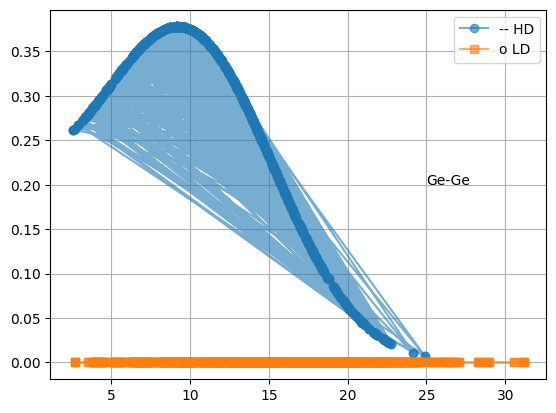

In [ ]:
plt.plot(cont_pos_ge_ge['value'], G_pos_ge_ge, marker='o', label='-- HD',alpha=0.6)
plt.plot(cont_neg_ge_ge['value'], G_neg_ge_ge, marker='s', label='o LD',alpha=0.6)

plt.annotate('Ge-Ge', xy=(4, 0.00008), xytext=(25, 0.20009))

plt.legend()
plt.grid()
plt.savefig("Ge-Ge_HDLD.png", dpi=300)
plt.show()

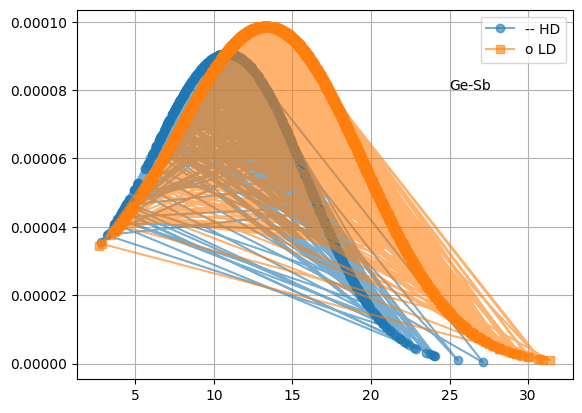

In [ ]:
plt.plot(cont_pos_ge_sb['value'], G_pos_ge_sb, marker='o', label='-- HD',alpha=0.6)
plt.plot(cont_neg_ge_sb['value'], G_neg_ge_sb, marker='s', label='o LD',alpha=0.6)

plt.annotate('Ge-Sb', xy=(4, 0.00008), xytext=(25, 0.00008))

plt.legend()
plt.grid()
plt.savefig('Ge-Sb_HDLD.png',dpi=300)
plt.show()

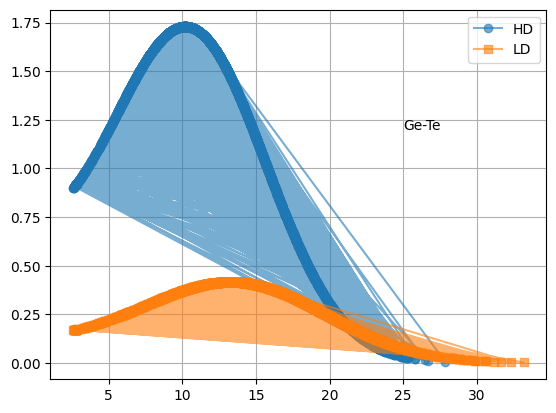

In [ ]:
plt.plot(cont_pos_ge_te['value'], G_pos_ge_te, marker='o', label='HD',alpha=0.6)
plt.plot(cont_neg_ge_te['value'], G_neg_ge_te, marker='s', label='LD',alpha=0.6)
plt.annotate('Ge-Te', xy=(4, 0.00008), xytext=(25, 1.2009))

plt.legend()
plt.grid()
plt.savefig('Ge-Te_HDLD.png',dpi=300)
plt.show()

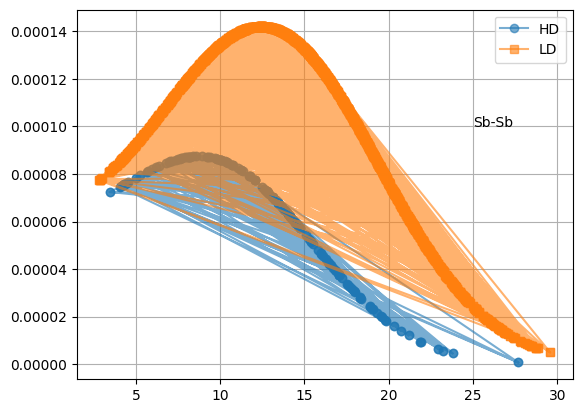

In [ ]:
plt.plot(cont_pos_sb_sb['value'], G_pos_sb_sb, marker='o', label='HD',alpha=0.6)
plt.plot(cont_neg_sb_sb['value'], G_neg_sb_sb, marker='s', label='LD',alpha=0.6)
plt.annotate('Sb-Sb', xy=(4, 0.00008), xytext=(25, 0.00010))

plt.legend()
plt.grid()
plt.savefig('Sb-Sb_HDLD.png',dpi=300)
plt.show()

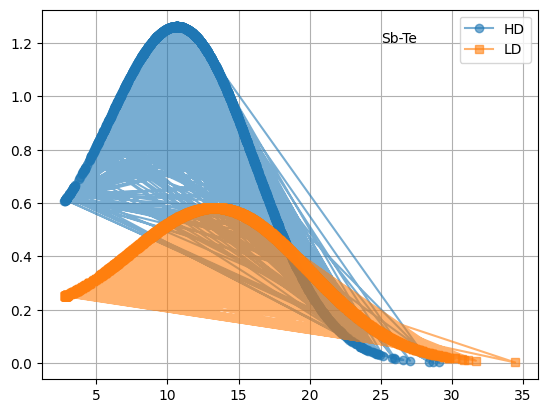

In [ ]:
plt.plot(cont_pos_sb_te['value'], G_pos_sb_te, marker='o', label='HD',alpha=0.6)
plt.plot(cont_neg_sb_te['value'], G_neg_sb_te, marker='s', label='LD',alpha=0.6)
plt.annotate('Sb-Te', xy=(4, 0.00008), xytext=(25, 1.2009))

plt.legend()
plt.grid()
plt.savefig('Sb-Te_HDLD.png',dpi=300)
plt.show()

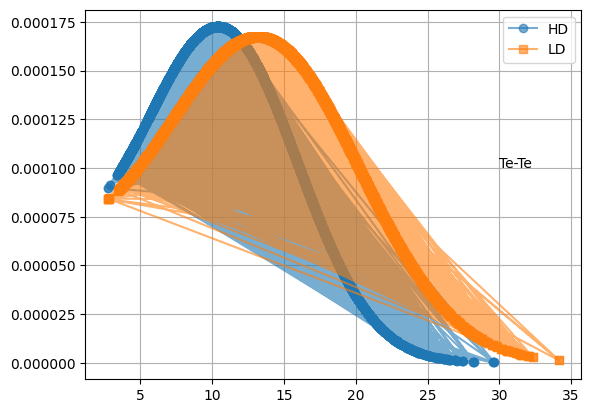

In [ ]:
plt.plot(cont_pos_te_te['value'], G_pos_te_te, marker='o', label='HD',alpha=0.6)
plt.plot(cont_neg_te_te['value'], G_neg_te_te, marker='s', label='LD',alpha=0.6)
plt.annotate('Te-Te', xy=(4, 0.00008), xytext=(30, 0.000100))

plt.legend()
plt.grid()
plt.savefig('Te-Te_HDLD.png',dpi=300)
plt.show()

#**Neuromorphic Material Generation**

In [ ]:
!pip install ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.4 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install -y build-essential libfftw3-dev libxc-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,750 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,059 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages 

In [ ]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/usr/local/lib/python3.11/dist-packages/setuptools/_vendor', '/root/.ipython']


In [ ]:
!pip3 install gpaw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gpaw: filename=gpaw-25.1.0-cp311-cp311-linux_x86_64.whl size=2822231 sha256=e170b33b31b3448d481c1e3cc4639061d96177383b553d398b36479518d8d3d1
  Stored in directory: /root/.cache/pip/wheels/f5/1e/05/db6758eab2e82f997345fec978af4684e2d16eb1913e4769db
Successfully built gpaw


In [ ]:
import sys
!{sys.executable} -m pip install --upgrade --no-cache-dir --prefix /usr/local gpaw

In [ ]:
!which gpaw

/usr/local/bin/gpaw


In [ ]:
import sys
import os
import subprocess

# Find gpaw using which command
try:
    gpaw_exec = subprocess.check_output(['which', 'gpaw']).decode().strip()
except subprocess.CalledProcessError:
    raise FileNotFoundError("Could not locate the gpaw executable. "
                            "Please make sure gpaw is installed and in your PATH.")
gpaw_data_dir = '/usr/local/lib/python3/dist-packages/gpaw/data'

# Create the directories if they don't exist:
os.makedirs(gpaw_data_dir, exist_ok=True)

!{gpaw_exec} install-data {gpaw_data_dir}

Available setups and pseudopotentials
  [*] https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-24.11.0.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-24.1.0.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.20000.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.11271.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.9672.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.8.7929.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.6.6300.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.5.3574.tar.gz

Selected gpaw-setups-24.11.0.tar.gz.  Downloading...
Extracting tarball into /usr/local/lib/python3/dist-packages/gpaw/data
Setups installed into /usr/local/lib/python3/dist-packages/gpaw/data/gpaw-setups-24.11.0.
Register this setup path in /root/.gpaw/rc.py? [y/n] y
Setup path registered in /root/.gpaw/rc.py.
Current GPAW setup paths in order of search priority:
   1. /usr/local/lib/python

In [ ]:
!gpaw info

 -------------------------------------------------------------------------------------------------
| python-3.11.13    /usr/bin/python3                                                              |
| gpaw-25.1.0       /usr/local/lib/python3.11/dist-packages/gpaw/                                 |
| ase-3.25.0        /usr/local/lib/python3.11/dist-packages/ase/                                  |
| numpy-2.0.2       /usr/local/lib/python3.11/dist-packages/numpy/                                |
| scipy-1.15.3      /usr/local/lib/python3.11/dist-packages/scipy/                                |
| libxc-5.1.7       yes                                                                           |
| _gpaw             /usr/local/lib/python3.11/dist-packages/_gpaw.cpython-311-x86_64-linux-gnu.so |
| MPI enabled       yes                                                                           |
| OpenMP enabled    no                                                                            |
|

In [ ]:
!pip install --q ase gpaw

!wget -q https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-24.11.0.tar.gz
!tar -xzf gpaw-setups-24.11.0.tar.gz

In [ ]:
import os
os.environ["GPAW_SETUP_PATH"] = "/content/gpaw-setups-24.11.0"

**GPAW Code for 1D Halide Perovskite Sandwiched between PMMA and PEDOT:PSS**

**Configuration ultimatum :-**
* **Ag/PMMA/HP/PEDOT:PSS/ITO**
* **PMMA : Poly (Methyl Methacrylate)**
* **PEDOT:PSS : Poly(3,4 -ethylenedioxythiopene) :Polystyrene sulfonate**
* **ITO : Indium Tin Oxide**
* **The additional snadwich layer is offered to avoid undesirable electrochemical metalization reaction with Ag**

In [ ]:
from ase import Atoms
from ase.build import molecule
from gpaw import GPAW, PW , FermiDirac
from ase.optimize import LBFGS
from ase.visualize import view
import numpy as np
from ase.build import bulk
# from ase.occupations import FermiDirac


def create_propylpyridinium():
    pyridine = molecule('C5H5N')
    propyl = Atoms('CCC', positions=[
        [0.0, 0.0, 0.0],
        [1.53, 0.0, 0.0],
        [3.06, 0.0, 0.0]
    ])
    pyridine.rotate(90, 'x')
    pyridine.translate([3.06, 0.0, 1.4])
    cation = propyl + pyridine
    cation.append('H')
    cation.positions[-1] = [3.06, 0.0, -0.9]
    return cation

def create_pbi3_chain(length=3):
    a = 3.2
    positions = []
    symbols = []
    for i in range(length):
        positions.append([i * a * 2, 0, 0])
        symbols.append('Pb')
        positions.append([i * a * 2, a, 0])
        positions.append([i * a * 2, -a, 0])
        positions.append([i * a * 2 + a, 0, 0])
        symbols += ['I'] * 3
    return Atoms(symbols=symbols, positions=positions)

def create_1d_hybrid(length=3):
    """Create 1D hybrid perovskite structure"""
    cation = create_propylpyridinium()
    anion = create_pbi3_chain(length)

    anion.center(vacuum=5, axis=1)
    anion.center(vacuum=5, axis=2)

    cations = cation.copy()
    for i in range(1, length):
        new_cation = cation.copy()
        new_cation.translate([i * 6.4, 0, 0])
        cations += new_cation

    cations.translate([-3.0, 5.0, 0])

    system = anion + cations

    cell = system.get_cell()
    cell[1,1] = 20
    cell[2,2] = 20
    system.set_cell(cell)
    system.set_pbc([True, False, False])

    return system

def create_pmma_segment(repeat_units=3):
    # Basic MMA monomer unit
    mma = Atoms('C5O2H8', positions=[
        [0.00, 0.00, 0.00],  # C1
        [1.50, 0.00, 0.00],  # C2
        [2.30, 1.40, 0.00],  # C3
        [1.50, 2.80, 0.00],  # C4
        [0.00, 2.80, 0.00],   # C5
        [2.30, -0.90, 0.00], # O1
        [3.60, 1.40, 0.00],   # O2
        [-0.90, -0.50, 0.00], # H1
        [0.90, -0.50, 0.00],  # H2
        [3.00, 2.30, 0.00],   # H3
        [2.00, 3.70, 0.00],   # H4
        [-0.90, 3.70, 0.00],  # H5
        [0.90, 3.70, 0.00],   # H6
        [4.30, 0.90, 0.00],   # H7
        [4.30, 1.90, 0.00]    # H8
    ])

    # Create polymer chain
    pmma = mma.copy()
    for i in range(1, repeat_units):
        new_mma = mma.copy()
        new_mma.translate([i * 2.80, 0, 0])
        pmma += new_mma

    return pmma

def create_pedot_pss_segment(repeat_units=3, sulfonation_degree = 0.33):
    edot = Atoms('C6O2S1H8', positions=[
        [0.00, 0.00, 0.00],  # S
        [1.40, 1.40, 0.00],   # C1
        [2.80, 0.00, 0.00],   # C2
        [4.20, 1.40, 0.00],   # C3
        [5.60, 0.00, 0.00],   # C4
        [1.40, -1.40, 0.00], # C5
        [4.20, -1.40, 0.00],  # C6
        [2.80, 2.80, 0.00],   # O1
        [5.60, 2.80, 0.00],   # O2
        [0.00, -2.00, 0.00],  # H1 (on S)
        [1.40, 2.40, 0.00],   # H2
        [2.80, -1.40, 0.00],  # H3
        [4.20, 2.40, 0.00],   # H4
        [5.60, -1.40, 0.00],  # H5
        [1.40, -2.40, 0.00],  # H6
        [4.20, -2.40, 0.00],  # H7
        [6.60, 0.00, 0.00]    # H8
    ])

    styrene = Atoms('C8H8', positions=[
        [0.0, 0.0, 0.0],    # Backbone C1
        [1.4, 0.0, 0.0],     # Backbone C2
        [2.1, 1.4, 0.0],     # Phenyl C1
        [3.5, 1.4, 0.0],     # Phenyl C2
        [4.2, 0.0, 0.0],     # Phenyl C3
        [3.5, -1.4, 0.0],    # Phenyl C4
        [2.1, -1.4, 0.0],    # Phenyl C5
        [1.4, 0.0, 1.4],     # Phenyl C6 (ortho position)
        [0.0, -1.0, 0.0],    # H on backbone
        [2.8, 2.1, 0.0],     # H on phenyl
        [4.9, 2.1, 0.0],     # H on phenyl
        [5.6, 0.0, 0.0],     # H on phenyl
        [4.9, -2.1, 0.0],    # H on phenyl
        [2.8, -2.1, 0.0],    # H on phenyl
        [1.4, 0.0, 2.1],     # H on phenyl
        [0.0, 1.0, 0.0]      # H on backbone
    ])

    # Sulfonated styrene unit
    sulfonated_styrene = styrene.copy()
    # Replace H at para position with SO3- group
    sulfonated_styrene += Atoms('SO3', positions=[
        [4.2, 0.0, -1.4],   # S attached to phenyl
        [5.2, 0.0, -1.4],   # O1
        [3.7, 1.0, -1.4],   # O2
        [3.7, -1.0, -1.4]   # O3
    ])

    del sulfonated_styrene[[11]]

    # Create PSS chain
    pss = Atoms()
    for i in range(repeat_units):
        if np.random.random() < sulfonation_degree:
            unit = sulfonated_styrene.copy()
        else:
            unit = styrene.copy()
        unit.translate([i * 4.2, 0, 0])
        pss += unit

    # Combine PEDOT and PSS
    pedot_pss = edot.copy()
    pedot_pss.translate([0, 5, 0])

    # Replicate and combine
    for i in range(repeat_units):
        new_edot = edot.copy()
        new_pss = pss.copy()
        new_edot.translate([i * 7.0, 5, 0])
        new_pss.translate([i * 4.2, 0, 0])
        pedot_pss += new_edot + new_pss

    return pedot_pss

def create_ito_slab(size=(2, 2, 3), vacuum=10):
    """Create a placeholder slab for ITO."""
    # This is a placeholder. A proper ITO bixbyite structure
    # would need to be defined explicitly.
    # For demonstration, creating a simple In slab.
    ito = bulk('In', 'fcc', a=4.05) # Using In as a placeholder
    slab = ito.repeat(size)
    slab.center(vacuum=vacuum, axis=2)  # Add vacuum along z-axis
    return slab


def create_ag_slab(size=(3, 3, 3), vacuum=10):
    """Create Ag (111) slab"""
    ag = bulk('Ag', 'fcc', a=4.09)
    slab = ag.repeat(size)
    slab.center(vacuum=vacuum, axis=2)
    return slab

def create_device_structure(hp_length=3, pmma_repeats=5, pedot_repeats=5):
    # Create individual components
    ag = create_ag_slab(size=(3, 3, 1))  # Thin Ag layer
    pmma = create_pmma_segment(repeat_units=pmma_repeats)
    hp = create_1d_hybrid(length=hp_length)
    pedot_pss = create_pedot_pss_segment(repeat_units=pedot_repeats)
    ito = create_ito_slab(size=(2, 2, 1))  # Thin ITO layer

    # Align all components along x-axis with proper spacing
    hp_center = np.mean(hp.positions[:, 0])

    # Position Ag at the bottom
    ag.translate([hp_center - np.mean(ag.positions[:, 0]),
                 0,
                 np.min(hp.positions[:, 2]) - 15])

    # Position PMMA above Ag
    pmma.translate([hp_center - np.mean(pmma.positions[:, 0]),
                   0,
                   np.max(ag.positions[:, 2]) + 5])

    # Position HP above PMMA
    hp.translate([0, 0, np.max(pmma.positions[:, 2]) + 5])

    # Position PEDOT:PSS above HP
    pedot_pss.translate([hp_center - np.mean(pedot_pss.positions[:, 0]),
                        0,
                        np.max(hp.positions[:, 2]) + 5])

    # Position ITO at the top
    ito.translate([hp_center - np.mean(ito.positions[:, 0]),
                  0,
                  np.max(pedot_pss.positions[:, 2]) + 5])

    # Combine all components
    device = ag + pmma + hp + pedot_pss + ito

    # Set large cell with vacuum in y and z
    cell = device.get_cell()
    cell[0,0] = 60  # Long x-dimension
    cell[1,1] = 40  # Vacuum in y
    cell[2,2] = np.max(device.positions[:, 2]) + 20  # Vacuum in z
    device.set_cell(cell)
    device.set_pbc([True, False, False])  # 1D periodicity

    return device

# Create and visualize the full device
device = create_device_structure(hp_length=3, pmma_repeats=5, pedot_repeats=5)
view(device)

# Set up GPAW calculation
calc = GPAW(mode=PW(500),
           xc='PBE',
           kpts=(2, 1, 1),
           txt='full_device.out',
           symmetry='off',
           occupations=FermiDirac(0.1))

device.calc = calc

device.write('full_device_optimized.cif')

**Benzyl-Pyridinium Lead Iodide**

In [ ]:
from ase import Atoms
from ase.build import molecule
from ase.visualize import view
import numpy as np

def create_benzylpyridinium():
    pyridine = molecule('C5H5N')
    # Benzyl group (C6H5-CH2-)
    benzyl = Atoms('C7H7', positions=[
        [0.00, 0.00, 0.00],  # CH2 carbon (attached to N)
        [1.39, 0.00, 0.00],  # Ortho carbon 1
        [1.39, 1.39, 0.00],  # Meta carbon 1
        [0.00, 1.39, 0.00],  # Para carbon
        [-1.39, 1.39, 0.00], # Meta carbon 2
        [-1.39, 0.00, 0.00], # Ortho carbon 2
        [0.00, -1.39, 0.00], # Ortho carbon 3
        # Hydrogens:
        [0.00, 0.00, 1.09],  # H on CH2
        [1.39, -0.93, 0.00], # H on ortho 1
        [2.28, 0.47, 0.00],  # H on meta 1
        [0.00, 2.28, 0.00],  # H on para
        [-2.28, 0.47, 0.00], # H on meta 2
        [-1.39, -0.93, 0.00],# H on ortho 2
        [0.00, -2.28, 0.00]  # H on ortho 3
    ])


    pyridine.rotate(90, 'x')
    benzyl.rotate(30, 'z')

    benzyl.translate(pyridine.positions[5] + [1.5, 0, 0])  # N is index 5 in C5H5N

    cation = pyridine + benzyl
    del cation[[8]]  # Remove one H from pyridine's N

    return cation

def create_pbi3_chain(length=3):
    a = 3.2
    positions = []
    symbols = []
    for i in range(length):
        positions.append([i * a * 2, 0, 0])  # Pb
        symbols.append('Pb')
        # Terminal Iodines
        positions.append([i * a * 2, a, 0])
        positions.append([i * a * 2, -a, 0])
        # Bridging Iodine
        positions.append([i * a * 2 + a, 0, 0])
        symbols += ['I'] * 3
    return Atoms(symbols=symbols, positions=positions)

def create_1D_hybrid_structure(length=3):
    """Create 1D benzylpyridinium lead iodide perovskite"""
    cation = create_benzylpyridinium()
    anion = create_pbi3_chain(length)


    anion.center(vacuum=5, axis=1)
    anion.center(vacuum=5, axis=2)

    # Replicate organic cations
    cations = cation.copy()
    for i in range(1, length):
        new_cation = cation.copy()
        new_cation.translate([i * 6.4, 0, 0])
        cations += new_cation

    cations.translate([-3.0, 5.0, 0])

    system = anion + cations

# Set cell vectors - making it fully 3D periodic for VESTA
# with large vacuum in y and z directions

############### ADDITIONAL(Just for visualization in VESTA; edit later) ###########################3
    cell = system.get_cell()
    cell[0,0] = 6.4 * length  # x dimension matches chain length
    cell[1,1] = 30  # Large vacuum in y
    cell[2,2] = 30  # Large vacuum in z
    system.set_cell(cell)
    system.set_pbc([True, True, True])  # Fully periodic for VESTA

    return system

structure = create_1D_hybrid_structure(length=3)

structure.write('benzylpyridinium_lead_iodide.cif')  # CIF format

In [ ]:
labels

array([-1,  2, -1, -1, -1,  2,  0, -1, -1,  1, 21, -1, -1,  6,  2,  0,  3,
       27, -1, -1, 22,  4, -1, -1, -1, -1, -1, 12, -1, -1, 10, -1, 21,  1,
        5, -1, -1, 15, -1,  5,  0, -1,  3, -1, -1,  7,  5, -1,  1, -1,  6,
        7, -1, -1,  0,  4, -1, -1,  1,  8, -1, 10,  7,  9, -1, -1, 10, -1,
       11, -1,  4, -1,  4, 15, -1, -1, -1, -1, -1, -1, -1, -1, -1, 11,  1,
       -1,  7, -1, -1, -1, 15, 12, 10, 10, 10, -1,  6, 14,  5, -1, -1, 10,
        6, 15,  6, -1, 13, -1,  7, -1, -1, 20, -1, 16, -1,  1, 14, -1, -1,
       -1,  1, 23, -1, -1, 11, -1, -1,  7, 15, -1, -1, -1,  9, 11,  8, -1,
       -1, -1, -1,  0,  8, -1,  7, 16, -1, 17, -1, -1, -1, -1, -1,  6, 21,
       -1, -1, -1, -1, 26,  7, 17, -1, -1, 13, -1,  2,  6, 10, -1, -1, 10,
        5, -1, 12,  7, -1, -1, -1, -1, 22, -1, -1, 13,  0,  3, 22, 27,  4,
        1, -1, -1, 20, 19, 12, 10, -1, 14,  7,  1, -1,  8, -1, -1,  6, 10,
        7, -1, -1, -1, 18, -1, -1, 10, -1, 19, 17, -1, -1, 21, 22,  2,  2,
       -1, -1, -1, 18, 10

In [ ]:
!pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 44.5 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=e972de8121d5f2c14ebb6245a66138bec33d9b297151a99549c5e5ae59206498
  Stored in directory: /root/.cache/pip/wheels/16/fb/76/306387739cf9d53b1c39b0c8aadbbb17dc05f256756d8fd915
Successfully built bibtexparser


In [ ]:
import pandas as pd
import numpy as np
from pymatgen.analysis.local_env import  VoronoiNN
from pymatgen.core import Structure,lattice
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Voronoi
